# Project 3: Recommender Systems
### Serena Tang, Liwen Yang, Winston Wang

### QUESTION 1
***Explore the Dataset: In this question, we explore the structure of the data.***
- ***A) Compute the sparsity of the movie rating dataset:*** $Sparsity = \dfrac{Total number of available ratings}{Total number of possible ratings}$
    - The spasity of the movie rating dataset is 0.016999683055613623; this implies that most users did not rate every movie. 

In [1]:
import pandas as pd
import numpy as np

# import ratings data
ratings_df = pd.read_csv('ratings.csv')

# create R matrix 
R = ratings_df.pivot(index = 'userId', columns ='movieId', values = 'rating').fillna(0)
R.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
R_sparsity = np.count_nonzero(R)/R.size
print('Sparsity of Rating Matrix: ', R_sparsity)

Sparsity of Rating Matrix:  0.016999683055613623


- ***B) Plot a histogram showing the frequency of the rating values: Bin the raw rating values into intervals of width 0.5 and use the binned rating values as the horizontal axis. Count the number of entries in the ratings matrix R that fall within each bin and use this count as the height of the vertical axis for that particular bin. Comment on the shape of the histogram.***
    - The data is slightly left skewed with most users leaving 4.0 rating on a movie. Most people rated the movie 3.0 and above, implying that users either usually enjoyed the movies they watched or those who did not enjoy the movies were less likely to give the movie a poor rating. 

Text(0, 0.5, 'Frequency')

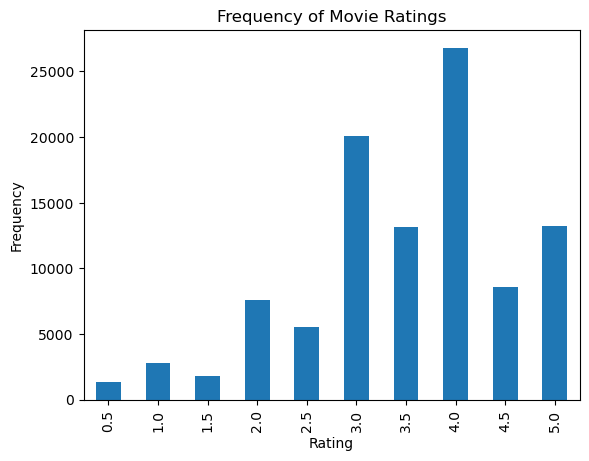

In [2]:
import matplotlib.pyplot as plt

# plot rating frequency
ratings_df.rating.value_counts().sort_index().plot(kind = 'bar')
plt.title('Frequency of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')

- ***C) Plot the distribution of the number of ratings received among movies: The X-axis should be the movie index ordered by decreasing frequency and the Y -axis should be the number of ratings the movie has received; ties can broken in any way. A monotonically decreasing trend is expected.***
    - The plot is shown below. 

Text(0, 0.5, 'Number of Ratings Recieved')

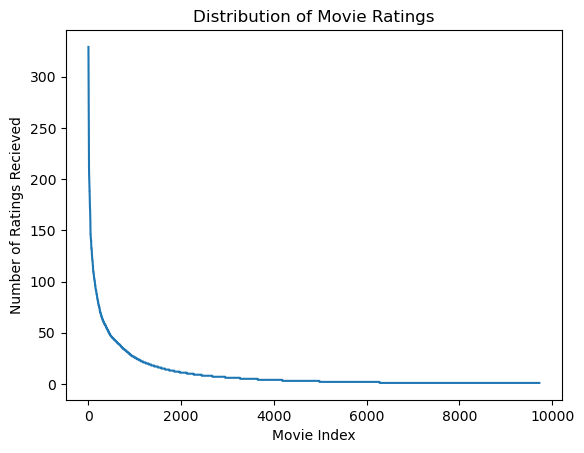

In [4]:
# plot rating distribution
plt.plot(list(ratings_df.movieId.value_counts().sort_values(ascending=False).values))
plt.title('Distribution of Movie Ratings')
plt.xlabel('Movie Index')
plt.ylabel('Number of Ratings Recieved')

- ***D) Plot the distribution of ratings among users: The X-axis should be the user index ordered by decreasing frequency and the Y -axis should be the number of movies the user has rated. The requirement of the plot is similar to that in Question C.***
    - The plot is shown below. 

Text(0, 0.5, 'Number of Movies Rated')

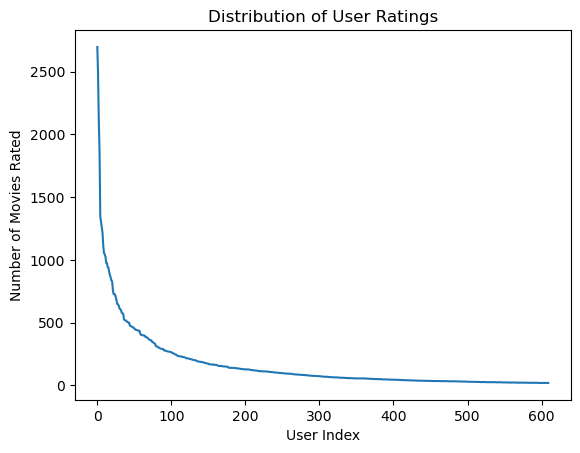

In [5]:
# plot rating distribution
plt.plot(list(ratings_df.userId.value_counts().sort_values(ascending=False).values))
plt.title('Distribution of User Ratings')
plt.xlabel('User Index')
plt.ylabel('Number of Movies Rated')

- ***E) Discuss the salient features of the distributions from Questions C,D and their implications for the recommendation process.***
    - Based on the distribution from part D, it appears that there are a few people who rate a lot of movies; this implies that most users usually rate only a few movies while a select few rate a lot of movies. Similarly, from the distribution from part C, it appears that most movies only have a few reviews while a small amount of movies have a lot of reviews. This can imply that many people will only rate a few movies that they feel strongly about while some people may rate all the movies they watch. 
    - These observations can imply that there may be an issue recommending movies to users as that user may not have rated enough movies for the system to send them a "good" recommendation or a movie may not have enough ratings for it to be pushed to users. This implies that the recommender system may need to accommodate for this as some users or movie may not have enough information to good them a "good" recommendation while minimizing the amount of "bad" recommendation. 

- ***F) Compute the variance of the rating values received by each movie: Bin the variance values into intervals of width 0.5 and use the binned variance values as the horizontal axis. Count the number of movies with variance values in the binned intervals and use this count as the vertical axis. Briefly comment on the shape of the resulting histogram.***
    - The histogram is shown below. The plot is heavily right skewed as most variances are between 0 and 1 with few a variances being larger than 3. 

Text(0, 0.5, 'Number of Movies')

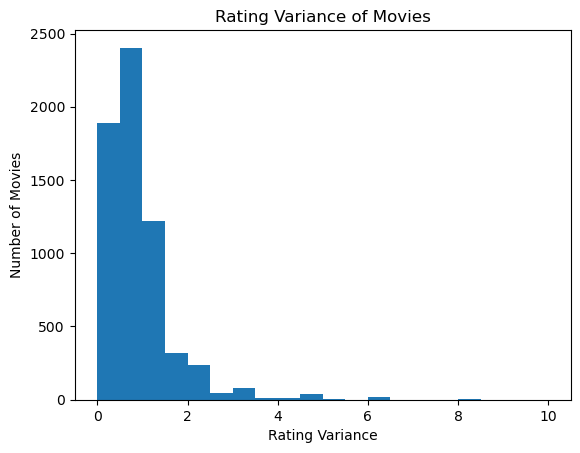

In [6]:
# get variance of ratings per movie
movies = np.unique(ratings_df.movieId)
rating_var = []
for i in movies:
    rating_var.append(ratings_df[ratings_df['movieId']==i].rating.var())

# plot variance
plt.hist(rating_var, bins = np.arange(0, max(rating_var), 0.5))
plt.title('Rating Variance of Movies')
plt.xlabel('Rating Variance')
plt.ylabel('Number of Movies')

### QUESTION 2
- ***A) Write down the formula for $\mu_u$ in terms of $I_u$ and $r_{uk}$***
    - $\mu_u = \frac{\sum_{k \in I_u} r_{uk} }{n(I_u)}$
    - $n(I_u)$ indicates the number of items that user $u$ rated
- ***B) In plain words, explain the meaning of $I_u \cap I_v$. Can $I_u \cap I_v$ = ∅? (Hint: Rating matrix R is sparse)***
    - $I_u \cap I_v$ is the intersection of items that user $u$ and user $v$ have rated; this is how many items that user $u$ and user $v$ have both rated. It is possible for $I_u \cap I_v$ = ∅ as this just means that user $u$ and user $v$ did not rate the same items; this appears to be very common as matrix $R$ is very sparse. 

### QUESTION 3
- ***Can you explain the reason behind mean-centering the raw ratings ($r_{vj} − \mu_v$) in the prediction function? (Hint: Consider users who either rate all items highly or rate all items poorly and the impact of these users on the prediction function.)***
    - Mean-centering the data helps to normalise the data to help prevent the data from overfitting the data due to outliers (users who either always very highly or very lowly rate items) as they can heavily skew the model/recommendations. 

### QUESTION 4
- ***Design a k-NN collaborative filter to predict the ratings of the movies in the original dataset and evaluate its performance using 10-fold cross validation. Sweep k (number of neighbors) from 2 to 100 in step sizes of 2, and for each k compute the average RMSE and average MAE obtained by averaging the RMSE and MAE across all 10 folds. Plot average RMSE (Y-axis) against k (X-axis) and average MAE (Y-axis) against k (X-axis).***
    - The two plots are shown below. 

In [3]:
from surprise.prediction_algorithms.knns import KNNWithMeans
from surprise.model_selection.validation import cross_validate
from surprise import Dataset, Reader

# load data
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(ratings_df[["userId", "movieId", "rating"]], reader)

Text(0, 0.5, 'Average MAE')

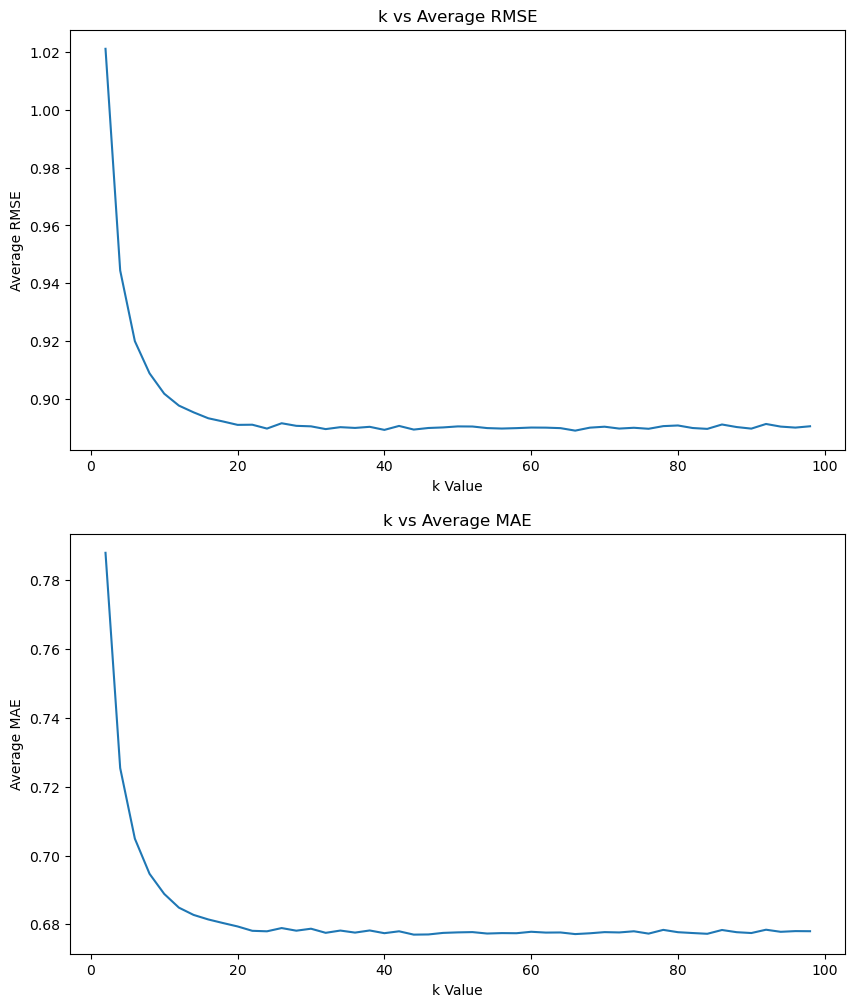

In [4]:
# calculate rmse and mae for each k
k = range(2,100,2)
rsme = []
mae = []
for i in k:
    algo = KNNWithMeans(k=i, sim_options = {"name": "pearson"})
    result = cross_validate(algo, data, cv=10, n_jobs=-1)
    rsme.append(np.mean(result['test_rmse']))
    mae.append(np.mean(result['test_mae']))

# plot RMSE and MAE
plt.figure(figsize=(10, 12))
plt.subplot(2, 1, 1)
plt.plot(k, rsme)
plt.title('k vs Average RMSE')
plt.xlabel('k Value')
plt.ylabel('Average RMSE')

plt.subplot(2, 1, 2)
plt.plot(k, mae)
plt.title('k vs Average MAE')
plt.xlabel('k Value')
plt.ylabel('Average MAE')

### QUESTION 5
- ***Use the plot from question 4, to find a `minimum k`. Note: The term `minimum k` in this context means that increasing k above the minimum value would not result in a significant decrease in average RMSE or average MAE. If you get the plot correct, then `minimum k` would correspond to the k value for which average RMSE and average MAE converges to a steady-state value. Please report the steady state values of average RMSE and average MAE.***
    - From question 4, the `minimum k` is at 20 for RMSE and 22 for MAE. RMSE has a steady state value of about 0.89 and MAE has a steady state value of about 0.68. 

### QUESTION 6
- ***Within EACH of the 3 trimmed subsets in the dataset, design (train and validate): A k-NN collaborative filter on the ratings of the movies (i.e Popular, Unpopular or High-Variance) and evaluate each of the three models’ performance using 10-fold cross validation:***
    - ***Sweep k (number of neighbors) from 2 to 100 in step sizes of 2, and for each k compute the average RMSE obtained by averaging the RMSE across all 10 folds. Plot average RMSE (Y-axis) against k (X-axis). Also, report the minimum average RMSE.***
        - The plots and the minimum average RMSE is shown below. 

In [4]:
#Trimming data
from collections import defaultdict

raw_ratings = data.raw_ratings
Moveid_ratings_dict = defaultdict(list)

# get all ratings for each movie
for ele in raw_ratings:
    Moveid_ratings_dict[ele[1]].append(ele[2])

# trim data based on subset category
def get_list(name, dictionary):
    A_list = []
    if name == "High_variance":
        for ele in dictionary:
            if len(dictionary[ele]) >= 5 and np.var(dictionary[ele]) >= 2:
                A_list.append(ele)
                
    elif name == "Unpopular":
        for ele in dictionary:
            if len(dictionary[ele]) <= 2:
                A_list.append(ele)
    else:
        for ele in dictionary:
            if len(dictionary[ele]) > 2:
                A_list.append(ele)
                
    return A_list
            
# More than 2 ratings
Popular = get_list("Popular", Moveid_ratings_dict)

# <= 2 ratings
Unpopular = get_list("Unpopular", Moveid_ratings_dict)

# >= 2 variance and >= 5 ratings 
High_variance = get_list("High_variance", Moveid_ratings_dict)

In [5]:
from surprise.model_selection import KFold, train_test_split
from surprise import accuracy

kf = KFold(n_splits=10)

def get_RMSE_plot(name, kf, Trimmed_array, Data):
    test_dataset = []
    Rmse = []
    k = range(2,100,2)

    # calculate RMSE
    for i in k:
        Rmse_10 = 0
        algo = KNNWithMeans(k=i, sim_options = {"name": "pearson"}, verbose = False)
    
        for train, test in kf.split(Data): 
            algo.fit(train)
            test_dataset = [i for i in test if i[1] in Trimmed_array]             
            prediction = algo.test(test_dataset)
            Rmse_10 += accuracy.rmse(prediction, verbose = False)
        
        # Average across 10 folds
        Rmse.append(Rmse_10/10)
    
    # Plot average RMSE
    plt.plot(k, Rmse)
    plt.title('k vs Average RMSE for ' + name)
    plt.xlabel('k Value')
    plt.ylabel('Average RMSE')
    print('Minimum Average RMSE for', name, ':', min(Rmse))

Minimum Average RMSE for popular movies : 0.8725240185836058


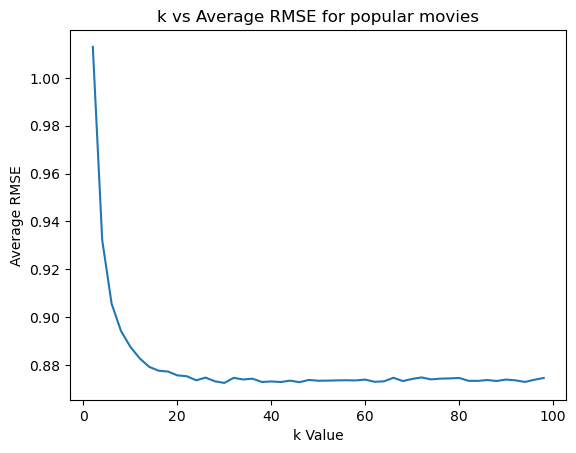

In [11]:
get_RMSE_plot("popular movies", kf, Popular, data)

Minimum Average RMSE for unpopular movies : 1.1107502261930442


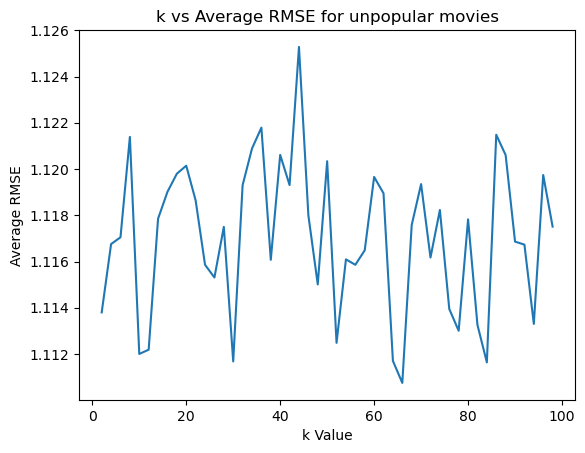

In [12]:
get_RMSE_plot("unpopular movies", kf, Unpopular, data)

Minimum Average RMSE for high variance movies : 1.4905502874641627


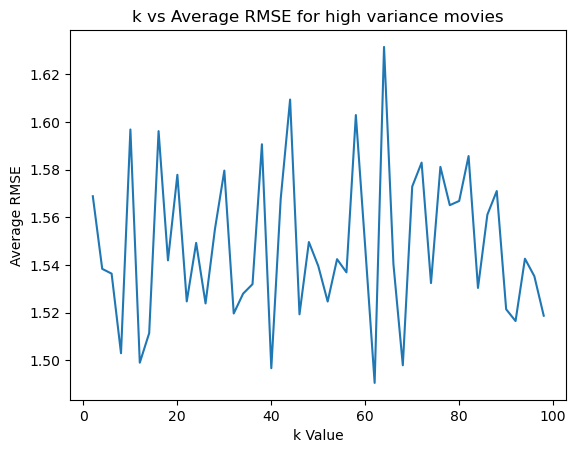

In [13]:
get_RMSE_plot("high variance movies", kf, High_variance, data)

- ***Plot the ROC curves for the k-NN collaborative filters for threshold values $[2.5,3,3.5,4]$. These thresholds are applied only on the ground truth labels in held-out validation set. For each of the plots, also report the area under the curve (AUC) value. You should have 4 × 4 plots in this section (4 trimming options – including no trimming times 4 thresholds) - all thresholds can be condensed into one plot per trimming option yielding only 4 plots.***
    - The ROC curves are shown below. For the popular movies, we chose k=22 as that is where it appears the RMSE goes to steady state. Since this was not obvious for the unpopular and high variance movies, we arbitrarily set it as k=20. 

In [6]:
from sklearn.metrics import roc_curve, auc

# get ROC plot using KNN
def get_ROC_plot(Name, k, kf, Trimmed_array, Data):
    
    Threshold = [2.5, 3, 3.5, 4]
    
    algo = KNNWithMeans(k=k, sim_options = {"name": "pearson"}, verbose = False)
  
    # Get Predictions
    if Name == "Original Dataset":
        train, test = train_test_split(data, test_size=0.1)
        algo.fit(train)
        prediction = algo.test(test)
    
    else:
        for train, test in kf.split(Data): 
            test_dataset = []
            algo.fit(train)
            test_dataset = [i for i in test if i[1] in Trimmed_array]

            prediction = algo.test(test_dataset)
        
    # Plot ROC Curves
    fig, axes = plt.subplots(nrows=1, ncols=4,figsize=(24,6))
    for thre in Threshold:
        test_true = []
        for ele in prediction:
            if ele.r_ui > thre:
                test_true.append(1)
            else:
                test_true.append(0)
        
        Index = Threshold.index(thre)
        fpr, tpr, _ = roc_curve(test_true, [ele.est for ele in prediction])
        
        axes[Index].plot(fpr, tpr, lw=5, ls='-', color='c', label="AUC: {}".format((auc(fpr,tpr))))
        axes[Index].plot([0, 1], [0, 1], lw=2, ls='--', color='g') 
        axes[Index].set_title("For threshold = {}".format(Threshold[Index]))
        axes[Index].set_xlabel('FTR')
        axes[Index].set_ylabel('TPR')
        axes[Index].legend()
    
    fig.suptitle(Name, fontsize=15)
    plt.show()

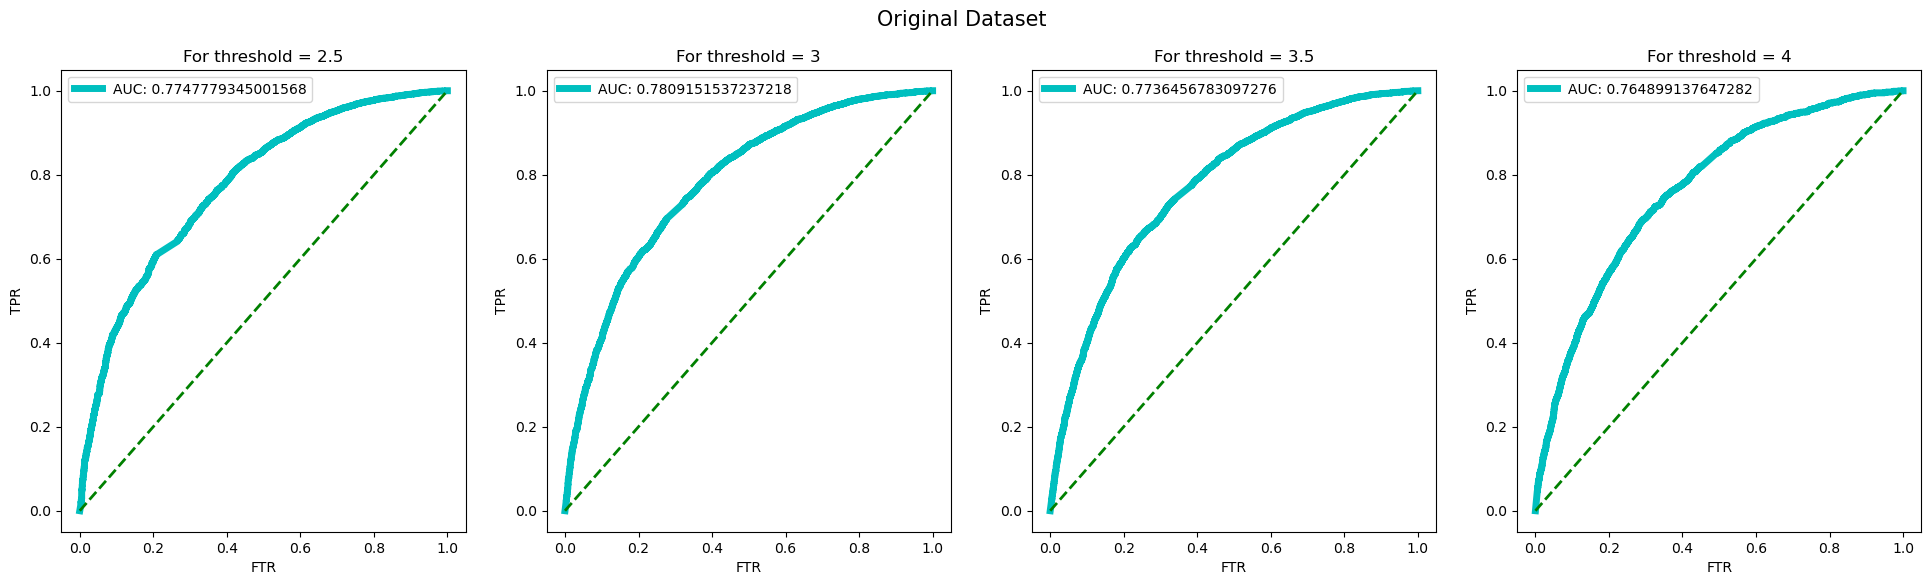

In [19]:
get_ROC_plot("Original Dataset", 20, kf, _, data)

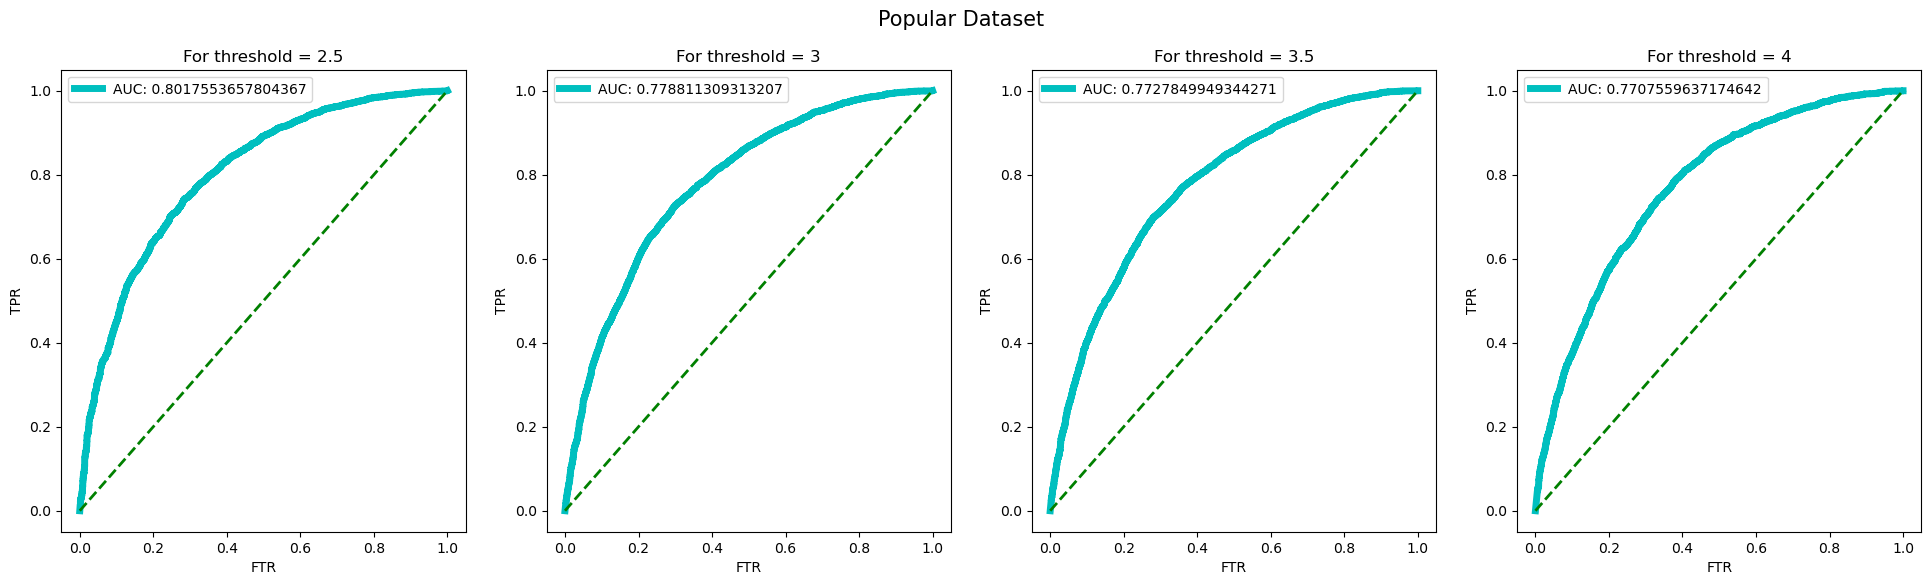

In [20]:
get_ROC_plot("Popular Dataset", 22, kf, Popular, data)

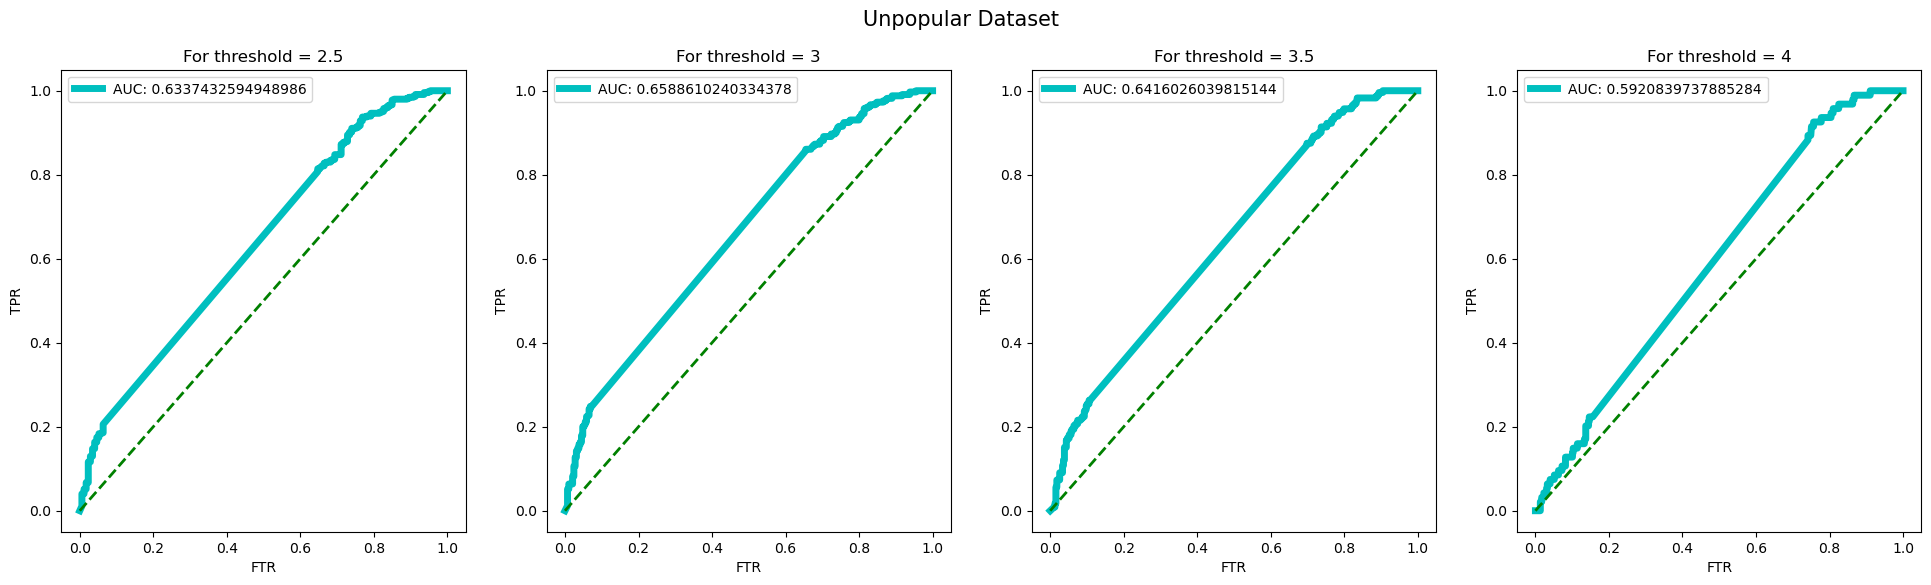

In [17]:
get_ROC_plot("Unpopular Dataset", 20, kf, Unpopular, data)

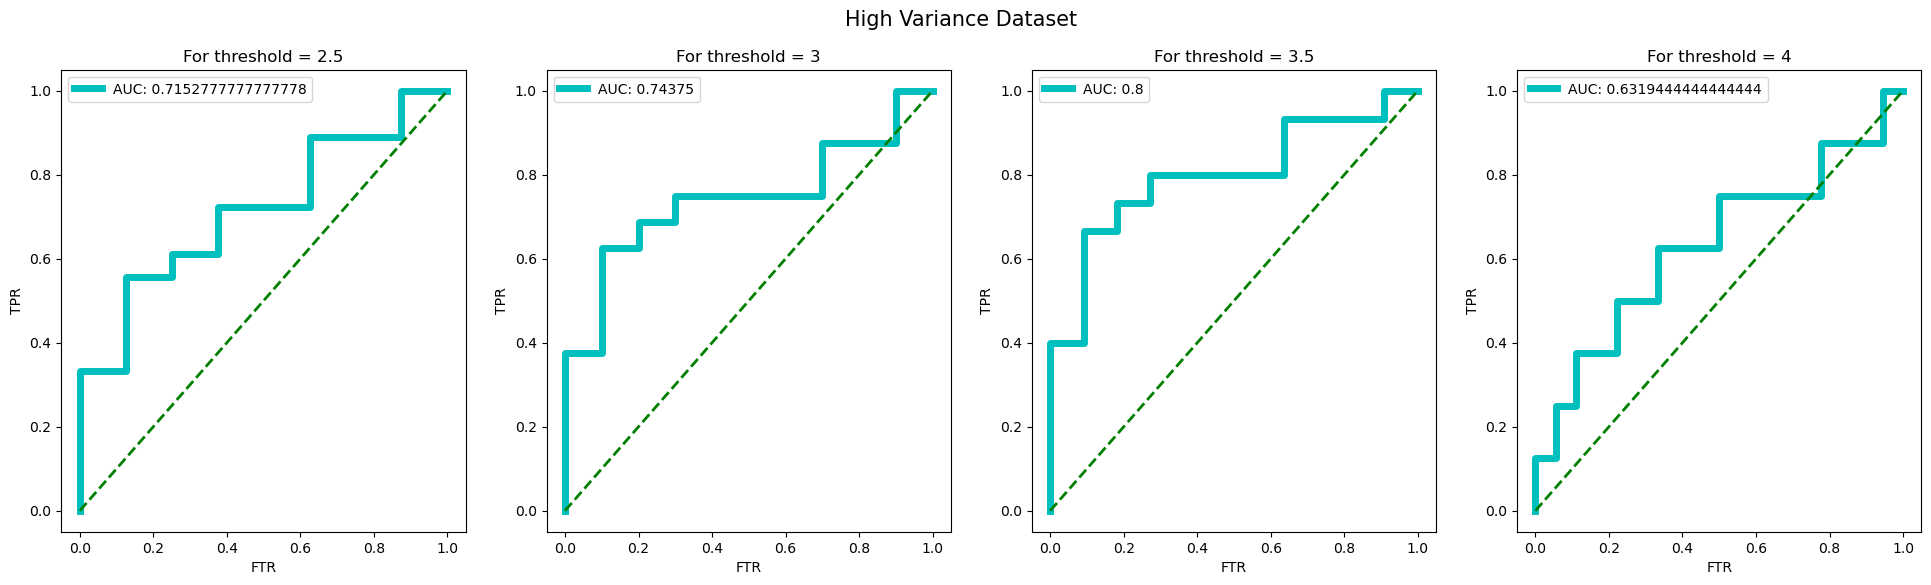

In [18]:
get_ROC_plot("High Variance Dataset", 20, kf, High_variance, data)

### QUESTION 7
- ***Understanding the NMF cost function: Is the optimization problem given by equation 5 convex? Consider the optimization problem given by equation 5. For U fixed, formulate it as a least-squares problem.***
    - The optimization problem give by equation 5 is not convex as we have to minimize it using 2 variables ($U$ and $V$); therefore, we may expect that more than one local minima exists. Additionally, if we find the matrix of the second derivative, it may not always be positive-semi definite. Therefore, this optimization problem is not convex. 
    - If U is fixed, then this equation becomes $\underset{V}{\operatorname{\min}} \sum_{i=1}^{m}\sum_{i=1}^{n} W_{ij}(r_{ij}-(UV^T)_{ij})^2$.

### QUESTION 8
- ***A) Design a NMF-based collaborative filter to predict the ratings of the movies in the original dataset and evaluate its performance using 10-fold cross-validation. Sweep k (number of latent factors) from 2 to 50 in step sizes of 2, and for each k compute the average RMSE and average MAE obtained by averaging the RMSE and MAE across all 10 folds. If NMF takes too long, you can increase the step size. Increasing it too much will result in poorer granularity in your results. Plot the average RMSE (Y-axis) against k (X-axis) and the average MAE (Y- axis) against k (X-axis). For solving this question, use the default value for the regularization parameter.***
    - The plots are shown below. 

Text(0, 0.5, 'Average MAE')

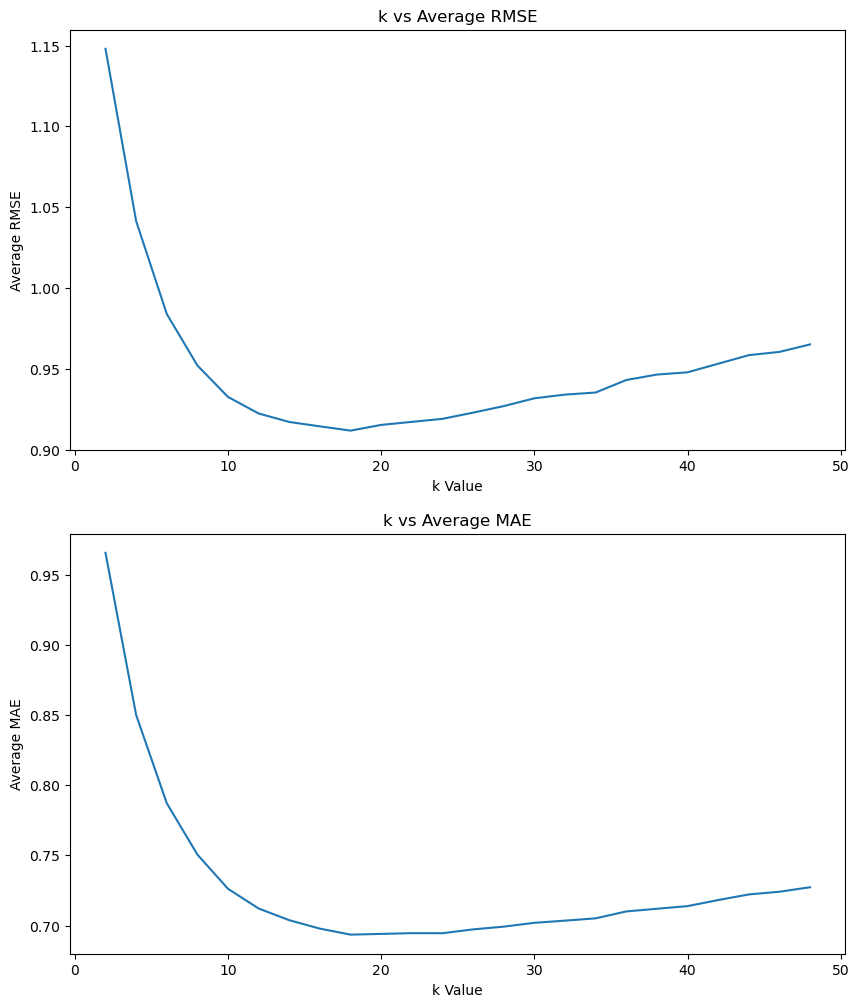

In [21]:
from surprise.prediction_algorithms.matrix_factorization import NMF

# Calculate RMSE and MAE
k = range(2,50,2)
nmf_rsme = []
nmf_mae = []
for i in k:
    nmf = NMF(i)
    result = cross_validate(nmf, data, cv=10, verbose=False, n_jobs=-1) 
    nmf_rsme.append(np.mean(result['test_rmse']))
    nmf_mae.append(np.mean(result['test_mae']))
    
# plot RMSE and MAE
plt.figure(figsize=(10, 12))
plt.subplot(2, 1, 1)
plt.plot(k, nmf_rsme)
plt.title('k vs Average RMSE')
plt.xlabel('k Value')
plt.ylabel('Average RMSE')

plt.subplot(2, 1, 2)
plt.plot(k, nmf_mae)
plt.title('k vs Average MAE')
plt.xlabel('k Value')
plt.ylabel('Average MAE')


- ***B) Use the plot from the previous part to find the optimal number of latent factors. Optimal number of latent factors is the value of k that gives the minimum average RMSE or the minimum average MAE. Please report the minimum average RMSE and MAE. Is the optimal number of latent factors same as the number of movie genres?***
    - The minimum average RMSE and MAE is shown below as well as the optimal number of latent factors. Neither optimal numbers match the number of movie genres as there are 20 total movie genres (including no movie genre); however, our optimal number of latent factors are both 18 based on using RMSE and MAE.

In [22]:
print('Minimum Average RMSE for NMF-based collaborative filter:', min(nmf_rsme))
print('Optimal number of latent factors using RMSE:', k[np.argmin(nmf_rsme)])

print('\nMinimum Average MAE for NMF-based collaborative filter:', min(nmf_mae))
print('Optimal number of latent factors using MAE:', k[np.argmin(nmf_mae)])

Minimum Average RMSE for NMF-based collaborative filter: 0.9118025316316857
Optimal number of latent factors using RMSE: 18

Minimum Average MAE for NMF-based collaborative filter: 0.6934957276631046
Optimal number of latent factors using MAE: 18


In [23]:
# calculate total number of movie genres
movies_df = pd.read_csv('movies.csv')
movie_genres = pd.unique(movies_df.genres)
unique_genre = []
for i in movie_genres:
    out = i.split('|')
    for genre in out:
        if genre not in unique_genre:
            unique_genre.append(genre)

print('Total number of movie genres: ', len(pd.unique(unique_genre)))

Total number of movie genres:  20


- ***C) Performance on trimmed dataset subsets: For each of Popular, Unpopular and High- Variance subsets***
    - ***Design a NMF collaborative filter to predict the ratings of the movies in the trimmed subset and evaluate its performance using 10-fold cross validation. Sweep k (number of latent factors) from 2 to 50 in step sizes of 2, and for each k compute the average RMSE obtained by averaging the RMSE across all 10 folds.***
    - ***Plot average RMSE (Y-axis) against k (X-axis); item Report the minimum average RMSE.***
    - The plots for the trimmed dataset subsets are shown below as well as the minimum average RMSE

In [24]:
kf = KFold(n_splits=10)

# get RMSE plot using NMF
def get_NMF_RMSE_plot(name, kf, Trimmed_array, Data):
    test_dataset = []
    Rmse = []
    k = range(2,50,2)

    for i in k:
        Rmse_10 = 0
        algo = NMF(i)
    
        for train, test in kf.split(Data): 
            algo.fit(train)
            test_dataset = [i for i in test if i[1] in Trimmed_array]             
            prediction = algo.test(test_dataset)
            Rmse_10 += accuracy.rmse(prediction, verbose = False)
        
        # count 10 times because 10 fold, take averge for the 10 values
        Rmse.append(Rmse_10/10)
        
    plt.plot(k, Rmse)
    plt.title('k vs Average RMSE for ' + name)
    plt.xlabel('k Value')
    plt.ylabel('Average RMSE')
    print('Minimum Average RMSE for', name, ':', min(Rmse))

Minimum Average RMSE for Popular movies : 0.8915031926631606


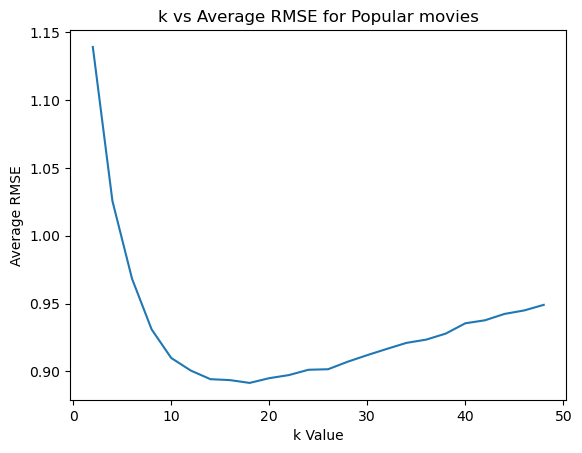

In [25]:
get_NMF_RMSE_plot("Popular movies", kf, Popular, data)

Minimum Average RMSE for Unpopular Movies : 1.1097999162765448


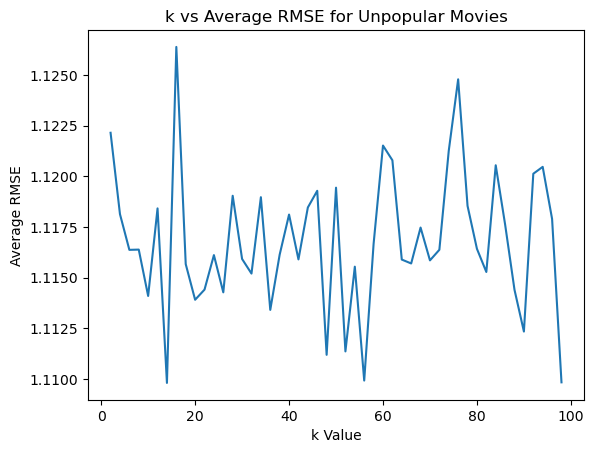

In [26]:
get_RMSE_plot("Unpopular Movies", kf, Unpopular, data)

Minimum Average RMSE for High Variance Movies : 1.4966558988015335


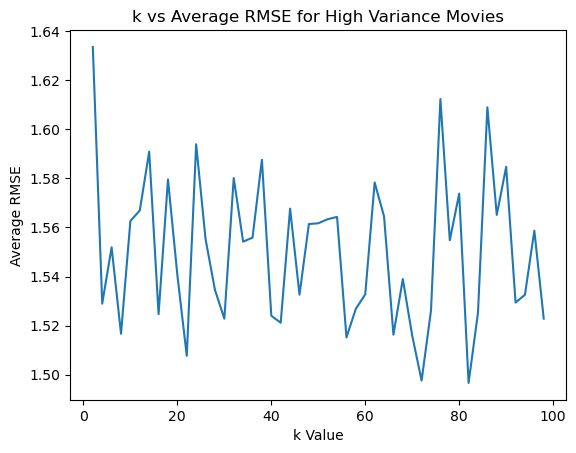

In [27]:
get_RMSE_plot("High Variance Movies", kf, High_variance, data)

- ***Plot the ROC curves for the NMF-based collaborative filter and also report the area under the curve (AUC) value as done in Question 6.***
    - The plots are shown below. For the original dataset, `k=18` was used as that is the optimal number of latent factors. For the popular dataset, `k=18` was also used as that is where the minimum RMSE occured. For the unpopular and high variance dataset, k was chosen arbitrarily as the minimum k value for steady state was not clear. 

In [28]:
# get roc plot using NMF
def get_NMF_ROC_plot(Name, k, kf, Trimmed_array, Data):
    
    Threshold = [2.5, 3, 3.5, 4]
    
    algo = NMF(k)
  
    if Name == "Original Dataset":
        train, test = train_test_split(data, test_size=0.1)
        algo.fit(train)
        prediction = algo.test(test)
    
    else:
        for train, test in kf.split(Data): 
            test_dataset = []
            algo.fit(train)
            test_dataset = [i for i in test if i[1] in Trimmed_array]
            prediction = algo.test(test_dataset)
        
        
    fig, axes = plt.subplots(nrows=1, ncols=4,figsize=(24,6))
    for thre in Threshold:
        test_true = []
        for ele in prediction:
            if ele.r_ui > thre:
                test_true.append(1)
            else:
                test_true.append(0)
        
        Index = Threshold.index(thre)
        fpr, tpr, _ = roc_curve(test_true, [ele.est for ele in prediction])
        
        axes[Index].plot(fpr, tpr, lw=5, ls='-', color='c', label="AUC: {}".format((auc(fpr,tpr))))
        axes[Index].plot([0, 1], [0, 1], lw=2, ls='--', color='g') 
        axes[Index].set_title("For threshold = {}".format(Threshold[Index]))
        axes[Index].set_xlabel('FTR')
        axes[Index].set_ylabel('TPR')
        axes[Index].legend()
    
    fig.suptitle(Name, fontsize=15)
    plt.show()

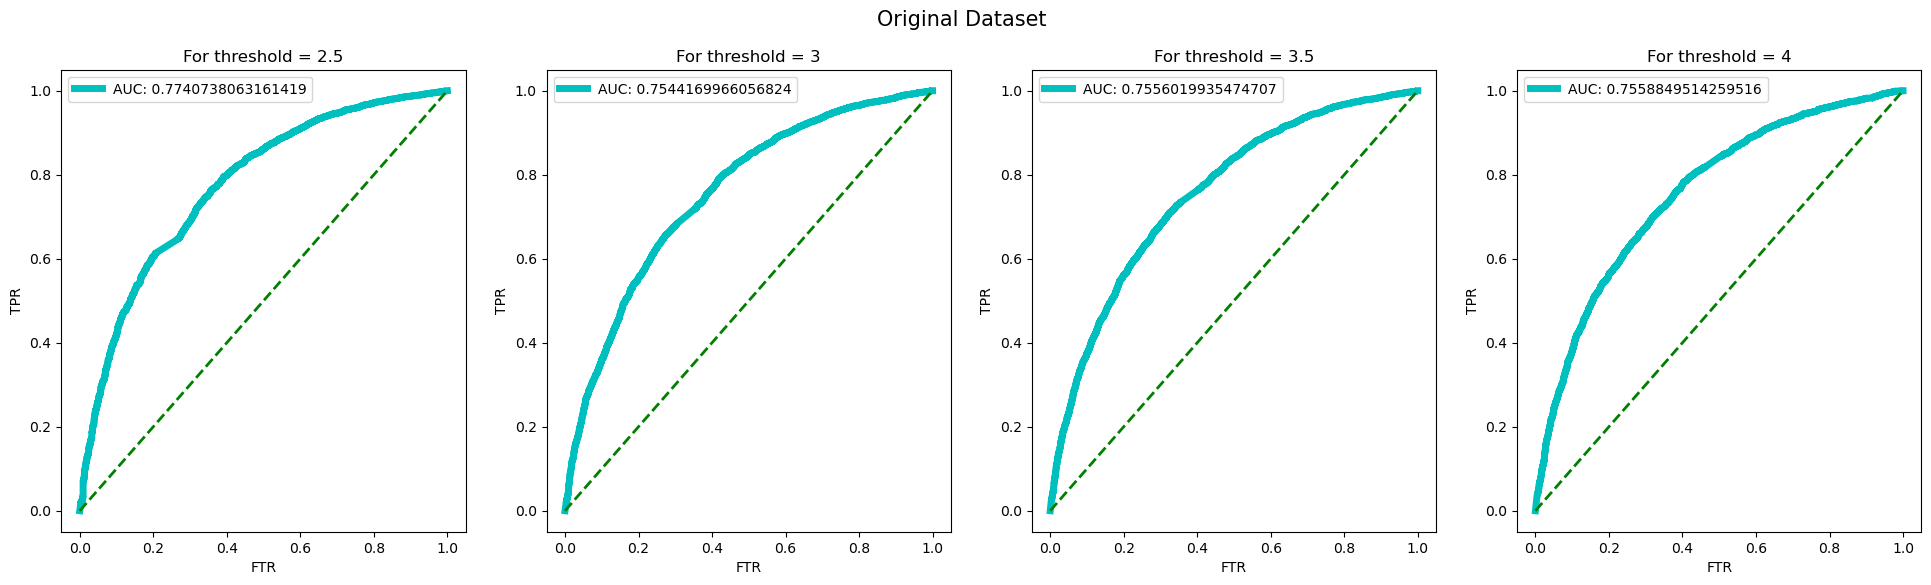

In [30]:
get_NMF_ROC_plot("Original Dataset", 18, kf, _, data)

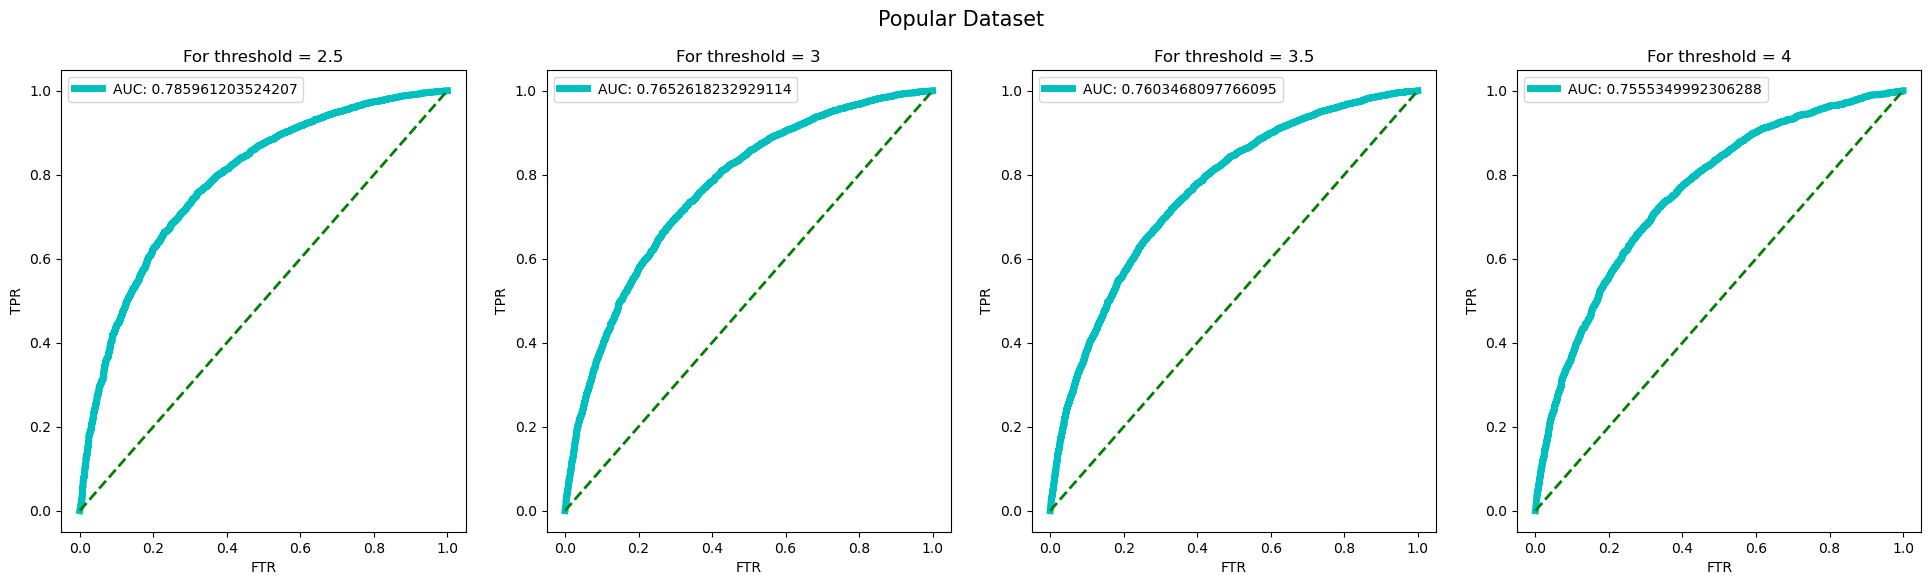

In [31]:
get_NMF_ROC_plot("Popular Dataset", 18, kf, Popular, data)

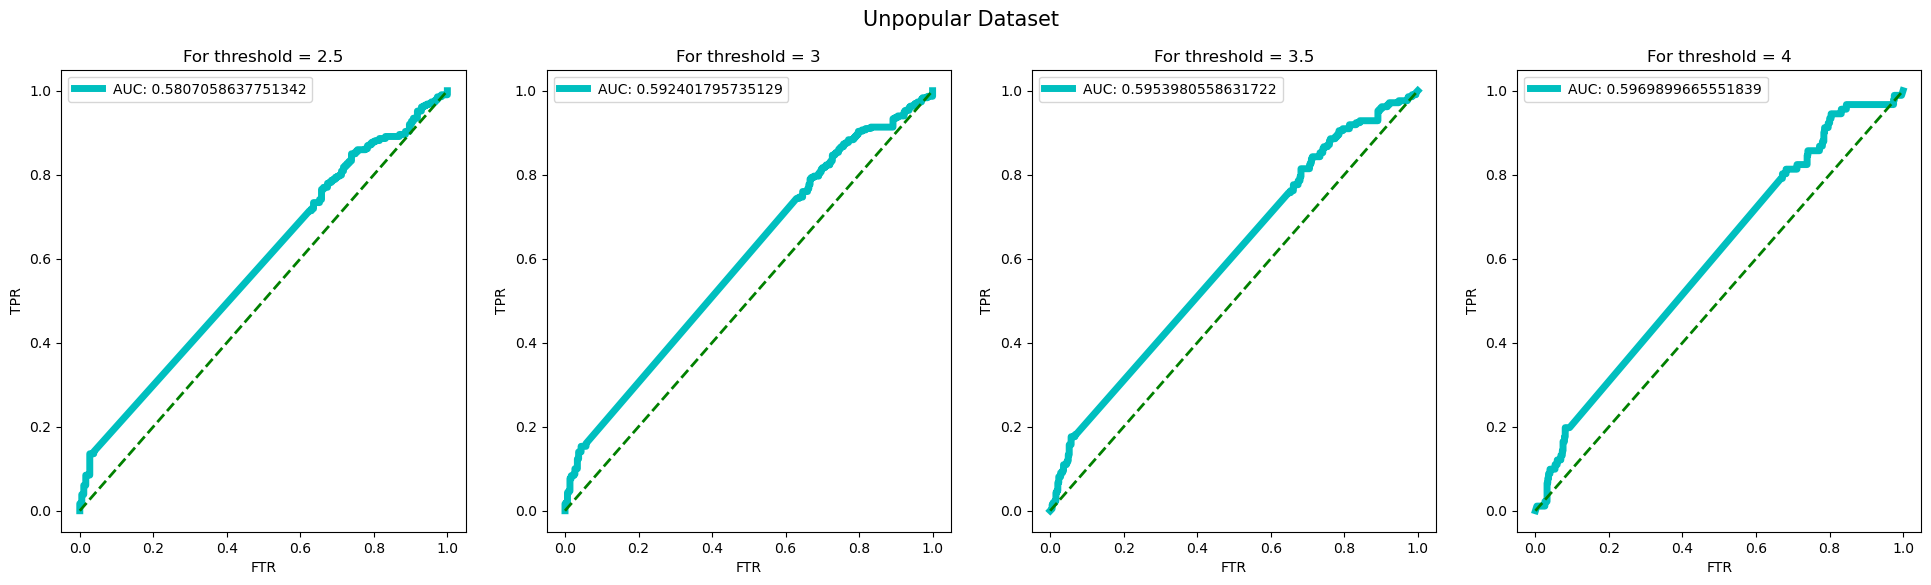

In [33]:
get_NMF_ROC_plot("Unpopular Dataset", 30, kf, Unpopular, data)

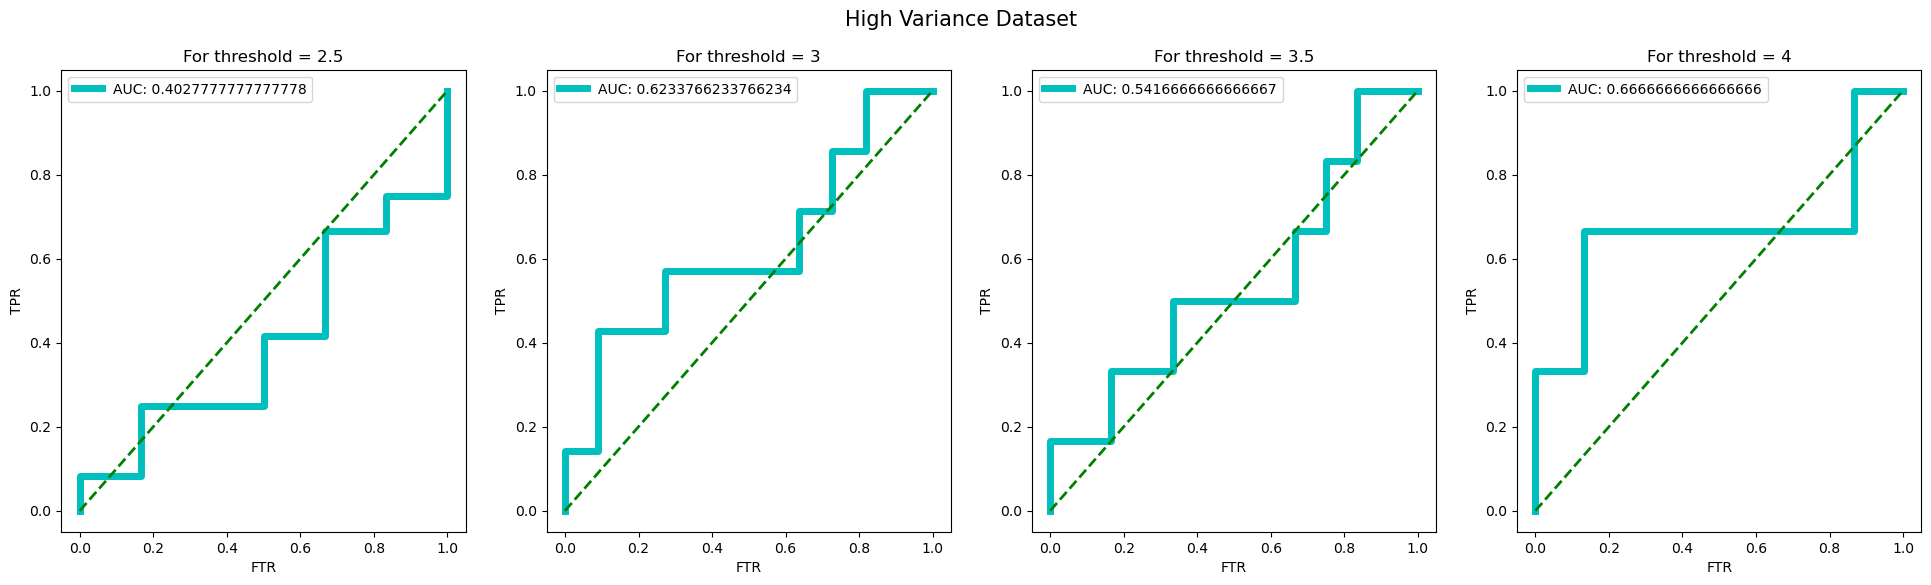

In [32]:
get_NMF_ROC_plot("High Variance Dataset", 40, kf, High_variance, data)

### QUESTION 9
- ***Perform Non-negative matrix factorization on the ratings matrix R to obtain the factor matrices U and V , where U represents the user-latent factors interaction and V represents the movie-latent factors interaction (use k = 20). For each column of V , sort the movies in descending order and report the genres of the top 10 movies. Do the top 10 movies belong to a particular or a small collection of genre? Is there a connection between the latent factors and the movie genres?***
    - The top 10 movies for the 20 columns of V are shown below. In general, the top 10 movies tend to belong to a small collection of movie genres as it tends to list multiple movie genres. Additionally, it seems that the number of latent factors correlates with the number of unique movie genres recommended to a user; particularly, as the number of movie latent factors increases, the amount of unique movie genres seem to decrease. For examples, for 2 latent factors, there are 10 unique movie genres (Drama, Crime, Thriller, Comedy, Adventure, Fantasy, Documentary, Action, Film-Noir, Romance); however, for 20 latent factors, there are 6 unique movie genres (Comedy, Drama, Thriller, Crime, Romance, War). 

In [31]:
# get V column from using NMF
train, test = train_test_split(data, test_size=0.1)
nmf_20 = NMF(20)
nmf_20.fit(train).test(test)
V = nmf_20.qi

In [32]:
# print the top 10 genres per column
for i in range(V.shape[1]): 
    genres_index = np.argsort(V[:, i]) # sort rows of columns in ascending order of its value
    genres_index_reverse = genres_index[::-1] # sort rows in descending order
    print('\nTop 10 genres in column', i, ":")
    for j in genres_index_reverse[:10]: # print top 10 genres
        print(movies_df['genres'][j])


Top 10 genres in column 0 :
Comedy
Horror|Thriller
Adventure|Children|Drama
Comedy|Drama
Comedy|Musical
Adventure|Children|Drama
Drama
Action|Crime|Drama|Horror
Drama|War
Action|Adventure|Comedy|Fantasy

Top 10 genres in column 1 :
Drama
Crime|Drama|Thriller
Comedy|Drama
Comedy|Drama
Adventure|Fantasy
Documentary
Drama
Action|Adventure|Thriller
Crime|Drama|Film-Noir|Romance|Thriller
Drama

Top 10 genres in column 2 :
Horror|Sci-Fi|Thriller
Comedy|Drama|Romance
Comedy
Adventure|Comedy|Thriller
Comedy
Drama
Animation|Children|Musical
Drama|Romance
Action|Crime|Drama|Horror|Thriller
Adventure|Children|Drama|Fantasy

Top 10 genres in column 3 :
Musical
Action|Crime|Thriller
Thriller
Adventure|Comedy|Crime
Drama
Drama
Drama
Action|Adventure|Sci-Fi|Thriller
Drama
Horror|Thriller

Top 10 genres in column 4 :
Adventure|Drama
Drama
Comedy|Documentary
Drama|Mystery|Sci-Fi
Documentary
Drama
Comedy
Action|Drama|War
Drama
Action|Animation|Children|Crime

Top 10 genres in column 5 :
Action|Children

### QUESTION 10

- ***A) Design a MF-based collaborative filter to predict the ratings of the movies in the original dataset and evaluate it’s performance using 10-fold cross-validation. Sweep k (number of latent factors) from 2 to 50 in step sizes of 2, and for each k compute the average RMSE and average MAE obtained by averaging the RMSE and MAE across all 10 folds. Plot the average RMSE (Y-axis) against k (X-axis) and the average MAE (Y-axis) against k (X-axis). For solving this question, use the default value for the regularization parameter.***
    - The plot is shown below. 

Text(0, 0.5, 'SVD Average MAE')

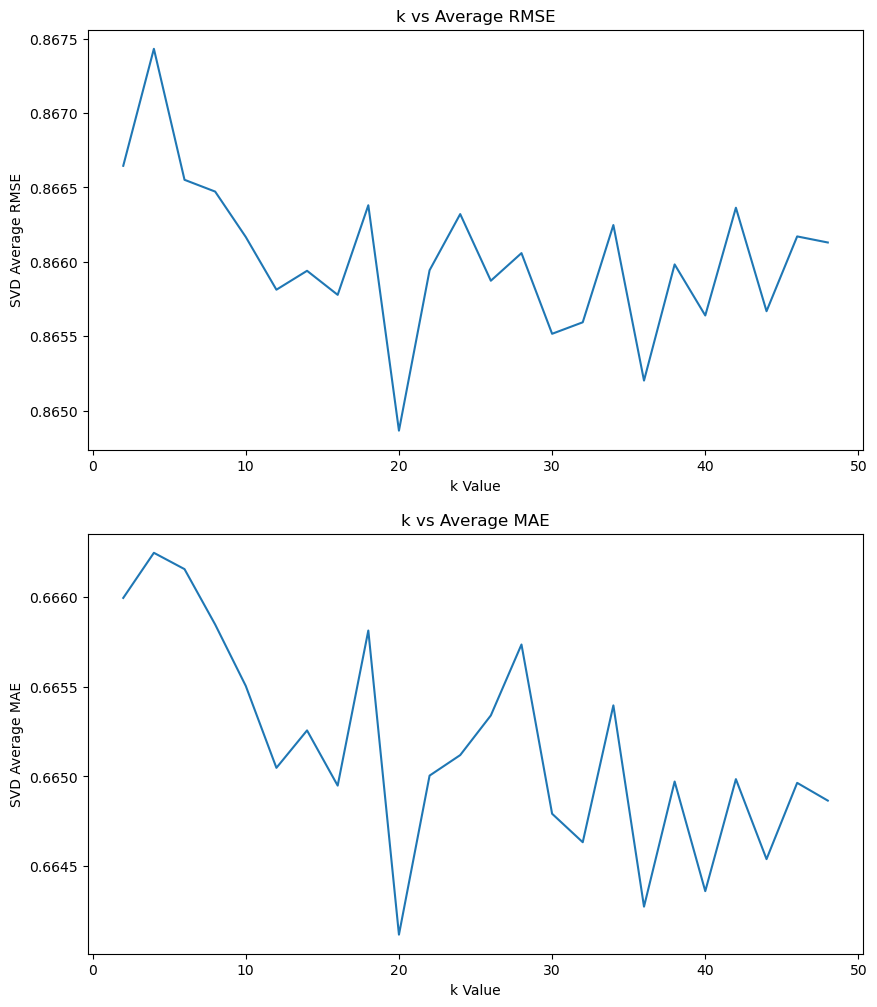

In [34]:
from surprise.prediction_algorithms.matrix_factorization import SVD

k = range(2,50,2)
rsme = []
mae = []
for i in k:
    svd = SVD(i)
    result = cross_validate(svd, data, cv=10, verbose=False, n_jobs=-1)
    rsme.append(np.mean(result['test_rmse']))
    mae.append(np.mean(result['test_mae']))
    
# plot RMSE and MAE
plt.figure(figsize=(10, 12))
plt.subplot(2, 1, 1)
plt.plot(k, rsme)
plt.title('k vs Average RMSE')
plt.xlabel('k Value')
plt.ylabel('SVD Average RMSE')

plt.subplot(2, 1, 2)
plt.plot(k, mae)
plt.title('k vs Average MAE')
plt.xlabel('k Value')
plt.ylabel('SVD Average MAE')


- ***B) Use the plot from the previous part to find the optimal number of latent factors. Optimal number of latent factors is the value of k that gives the minimum average RMSE or the minimum average MAE. Please report the minimum average RMSE and MAE. Is the optimal number of latent factors same as the number of movie genres?***
    - The optimal number of latent factors and the minimum average RMSE and MAE are shown below. Since there are 20 movie genres and both optimal number of latent factors is 20, the optimal number of latent factors is the same as the number of movie genres. 

In [35]:
print('Minimum Average RMSE for MF-based collaborative filter:', min(rsme))
print('Optimal number of latent factors using RMSE:', k[np.argmin(rsme)])

print('\nMinimum Average MAE for MF-based collaborative filter:', min(mae))
print('Optimal number of latent factors using MAE:', k[np.argmin(mae)])

Minimum Average RMSE for MF-based collaborative filter: 0.8648652951831499
Optimal number of latent factors using RMSE: 20

Minimum Average MAE for MF-based collaborative filter: 0.6641192795723727
Optimal number of latent factors using MAE: 20


- ***C) Performance on dataset subsets: For each of Popular, Unpopular and High-Variance subsets***
    - ***Design a MF collaborative filter to predict the ratings of the movies in the trimmed subset and evaluate its performance using 10-fold cross validation. Sweep k (number of latent factors) from 2 to 50 in step sizes of 2, and for each k compute the average RMSE obtained by averaging the RMSE across all 10 folds.***
    - ***Plot average RMSE (Y-axis) against k (X-axis); item Report the minimum average RMSE.***
    - The RMSE plots and the minimum average RMSE are shown below. 

In [36]:
kf = KFold(n_splits=10)

# plotting RMSE plot using MF
def get_MF_RMSE_plot(name, kf, Trimmed_array, Data):
    test_dataset = []
    Rmse = []
    k = np.arange(2,50,2)

    for i in k:
        Rmse_10 = 0
        algo = SVD(i) 
    
        for train, test in kf.split(Data): 
            algo.fit(train)
            test_dataset = [i for i in test if i[1] in Trimmed_array]
                    
            prediction = algo.test(test_dataset)
            Rmse_10 += accuracy.rmse(prediction, verbose = False)
        
        # count 10 times because 10 fold, take averge for the 10 values
        Rmse.append(Rmse_10/10)
        
    plt.plot(k, Rmse)
    plt.title('k vs SVD Average RMSE using MF for ' + name)
    plt.xlabel('k Value')
    plt.ylabel('SVD Average RMSE')
    print('Minimum Average RMSE using MF for', name, ':', min(Rmse))

Minimum Average RMSE using MF for popular movies : 0.8579799997686225


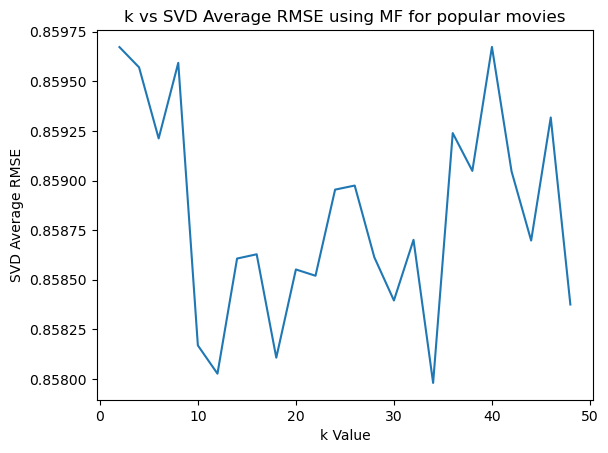

In [37]:
get_MF_RMSE_plot("popular movies", kf, Popular, data)

Minimum Average RMSE using MF for Unpopular Movies : 0.9707957389757832


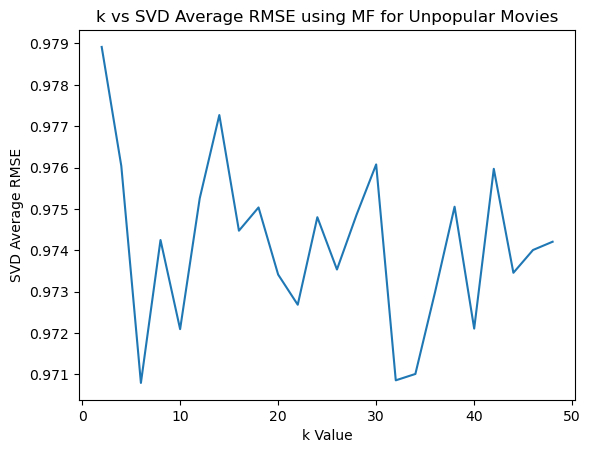

In [38]:
get_MF_RMSE_plot("Unpopular Movies", kf, Unpopular, data)

Minimum Average RMSE using MF for High Variance Movies : 1.4418501448107828


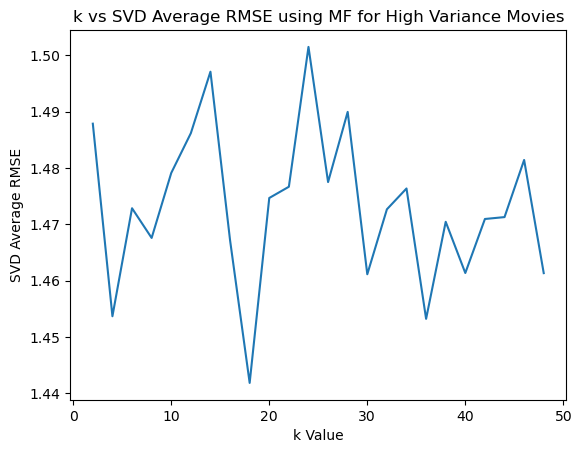

In [39]:
get_MF_RMSE_plot("High Variance Movies", kf, High_variance, data)

- ***Plot the ROC curves for the MF-based collaborative filter and also report the area under the curve (AUC) value as done in Question 6***
    - The plots and the AUC are shown below. The k values were chosen based on the value of K that causes the minimum RMSE as it was not clear where the RMSE went to steady state. Additionally, the RMSE for all plots changed less than 0.01, so changing k did not drastically change RMSE. 

In [40]:
# plotting ROC curve plot
def get_MF_ROC_plot(Name, k, kf, Trimmed_array, Data):
    
    Threshold = [2.5, 3, 3.5, 4]
    
    algo = SVD(k)
  
    if Name == "Original Dataset":
        train, test = train_test_split(data, test_size=0.1)
        algo.fit(train)
        prediction = algo.test(test)
    
    else:
        for train, test in kf.split(Data): 
            test_dataset = []
            algo.fit(train)
            test_dataset = [i for i in test if i[1] in Trimmed_array]
            prediction = algo.test(test_dataset)
        
        
    fig, axes = plt.subplots(nrows=1, ncols=4,figsize=(24,6))
    for thre in Threshold:
        test_true = []
        for ele in prediction:
            if ele.r_ui > thre:
                test_true.append(1)
            else:
                test_true.append(0)
        
        Index = Threshold.index(thre)
        fpr, tpr, _ = roc_curve(test_true, [ele.est for ele in prediction])
        
        axes[Index].plot(fpr, tpr, lw=5, ls='-', color='c', label="AUC: {}".format((auc(fpr,tpr))))
        axes[Index].plot([0, 1], [0, 1], lw=2, ls='--', color='g') 
        axes[Index].set_title("For threshold = {}".format(Threshold[Index]))
        axes[Index].set_xlabel('FTR')
        axes[Index].set_ylabel('TPR')
        axes[Index].legend()
    
    fig.suptitle(Name, fontsize=15)
    plt.show()

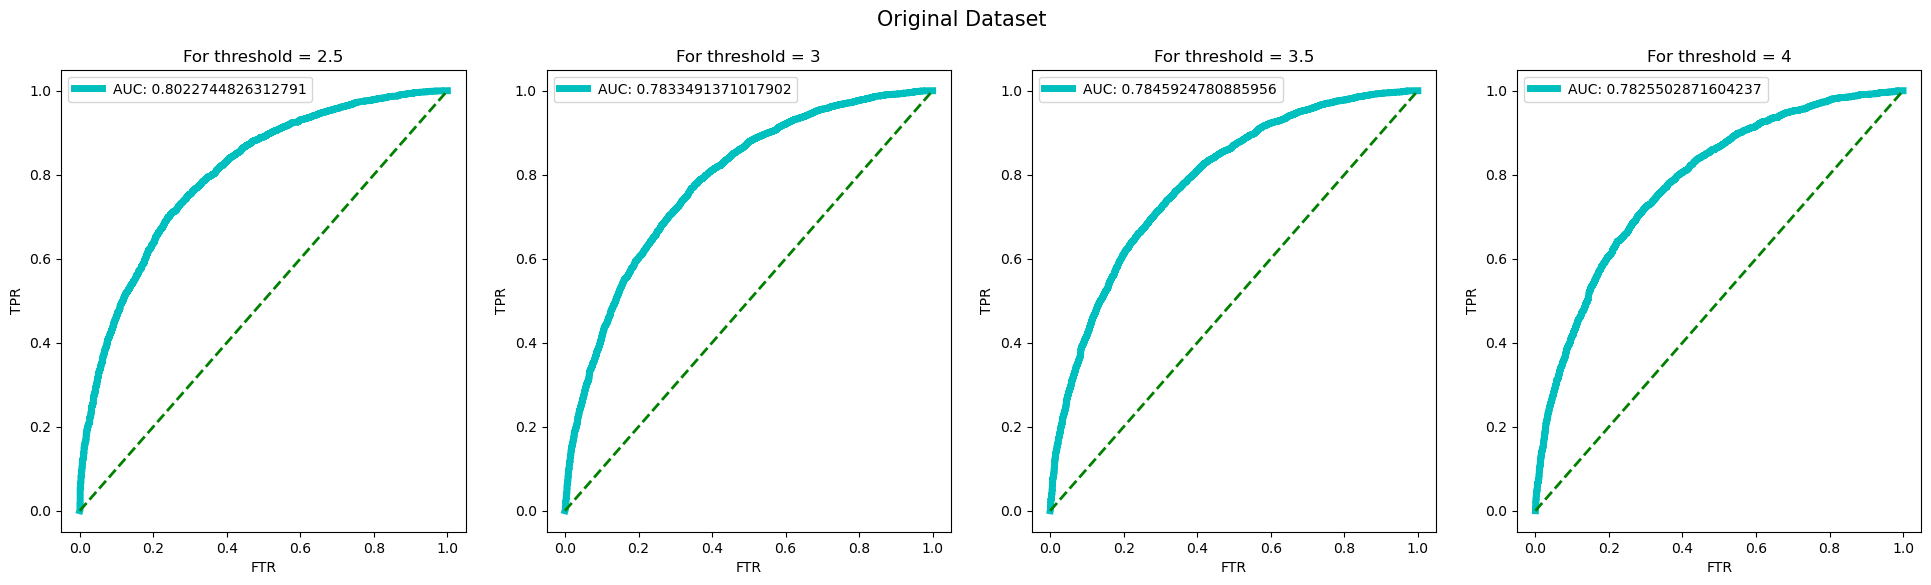

In [41]:
get_MF_ROC_plot("Original Dataset", 20, kf, _, data)

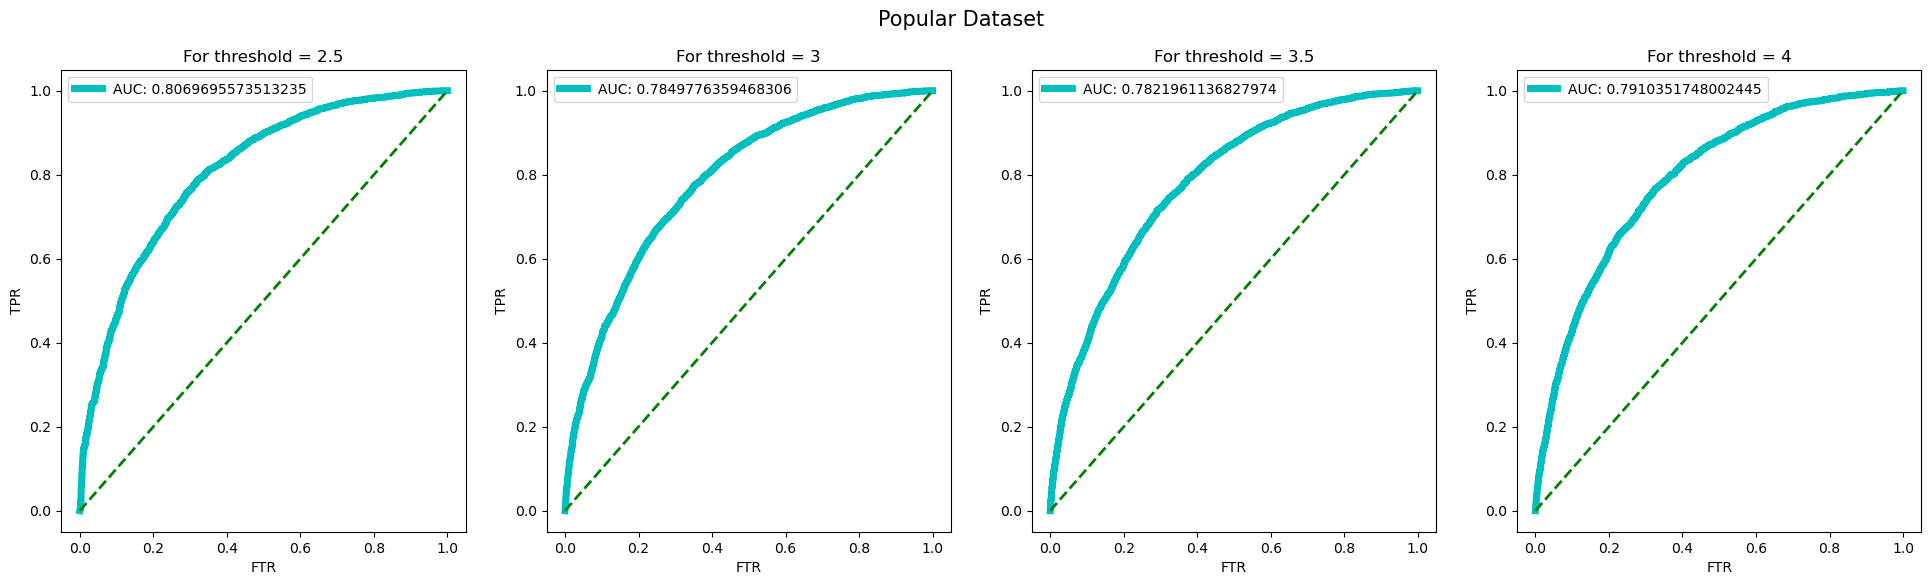

In [42]:
get_MF_ROC_plot("Popular Dataset", 34, kf, Popular, data)

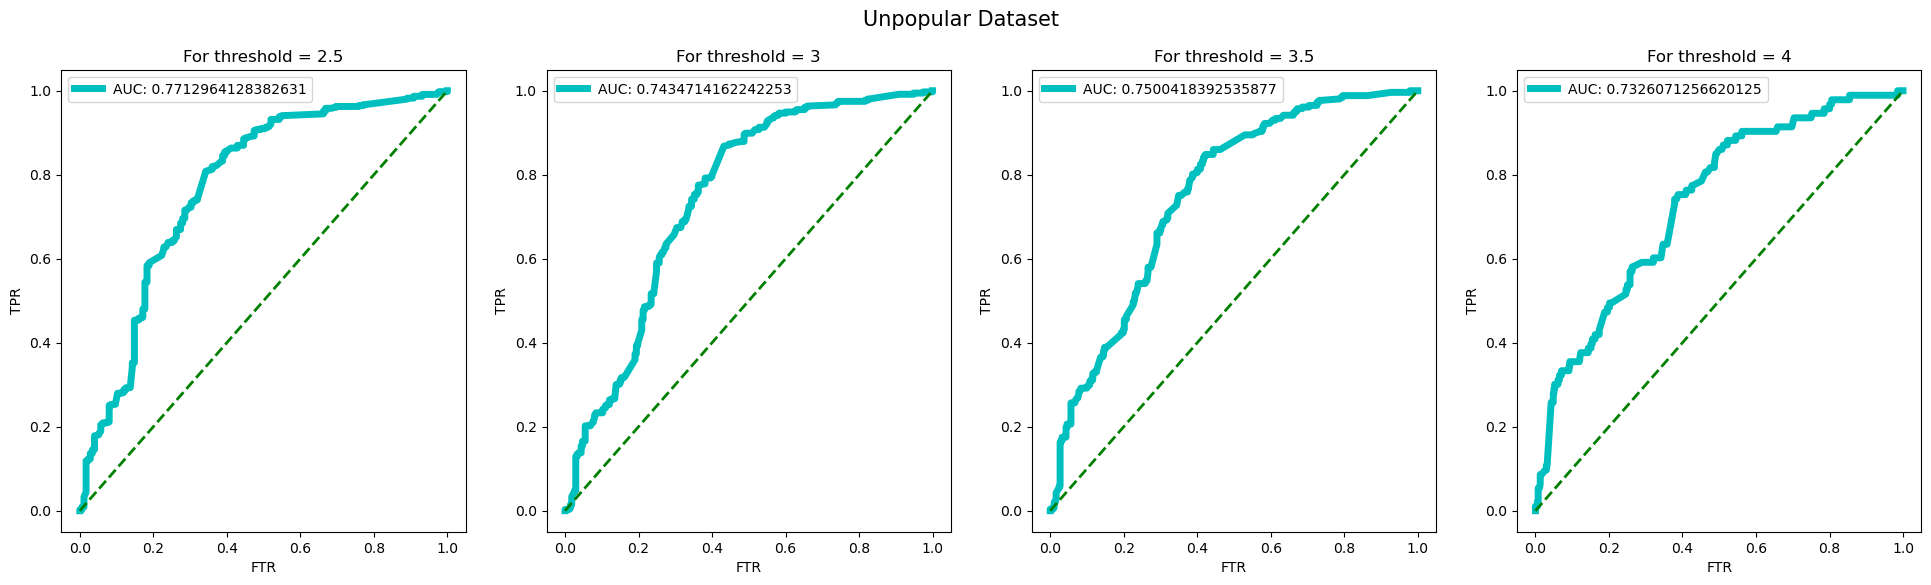

In [43]:
get_MF_ROC_plot("Unpopular Dataset", 8, kf, Unpopular, data)

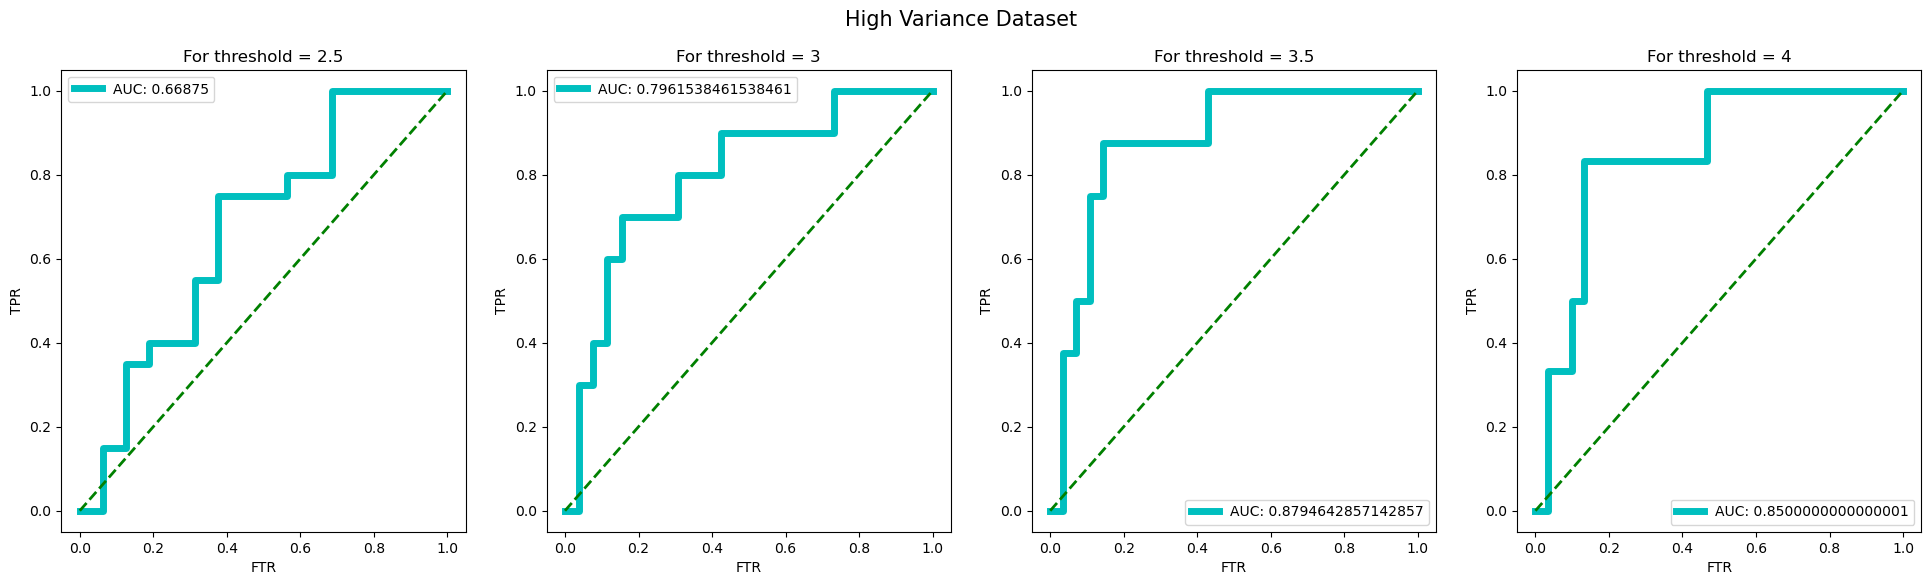

In [44]:
get_MF_ROC_plot("High Variance Dataset", 18, kf, High_variance, data)

### QUESTION 11

- ***Design a naive collaborative filter to predict the ratings of the movies in the original dataset and evaluate it’s performance using 10-fold cross validation. Compute the average RMSE by averaging the RMSE across all 10 folds. Report the average RMSE.***
- ***Performance on dataset subsets: For each of Popular, Unpopular and High-Variance test subsets***
    - ***Design a naive collaborative filter to predict the ratings of the movies in each trimmed set and evaluate it’s performance using 10-fold cross validation.***
    - ***Compute the average RMSE by averaging the RMSE across all 10 folds. Report the average RMSE.***

In [9]:
from surprise.model_selection.split import KFold
from sklearn.metrics import mean_squared_error
    
# get average rating per user
def naive_collab_filter(rating):
    user_ratings={}
    user_ave_rating = {}
    for i in rating: 
        if i[0] not in user_ratings.keys():
            user_ratings[i[0]] = [i[2]]
        else:
            user_ratings[i[0]].append(i[2])
    for user in user_ratings.keys():
        user_ave_rating[user] = np.mean(user_ratings[user])
    return user_ave_rating

# calculate rmse 
def calculate_RMSE(user_ave, data, filtertype, filtermovies):
    rmse = 0
    kfold_10 = KFold(n_splits=10)
    if filtertype == 'Original':
        for trainset, testset in kfold_10.split(data):
            predicted_rating = [user_ave[i[0]] for i in testset]
            true_rating = [i[2] for i in testset]
            rmse += np.sqrt(mean_squared_error(true_rating, predicted_rating))
    else:
        for trainset, testset in kfold_10.split(data):
            filter_data = [i for i in testset if i[1] in filtermovies]
            predicted_rating = [user_ave[i[0]] for i in filter_data]
            true_rating = [i[2] for i in filter_data]
            rmse += np.sqrt(mean_squared_error(true_rating, predicted_rating))
    return rmse/10

In [46]:
## original data
original_average = naive_collab_filter(data.raw_ratings)
original_rsme = calculate_RMSE(original_average, data, 'Original', data)
print('Average RMSE for original data set using naive collaborative filtering: ', original_rsme)

## popular
popular_rsme = calculate_RMSE(original_average, data, 'Popular', Popular)
print('Average RMSE for Popular movie Trimming data set using naive collaborative filtering: ', popular_rsme)

## unpopular
unpopular_rsme = calculate_RMSE(original_average, data, 'Unpopular', Unpopular)
print('Average RMSE for Unopular movie Trimming data set using naive collaborative filtering: ', unpopular_rsme)

## high_variance
hv_rsme = calculate_RMSE(original_average, data, 'High Variance', High_variance)
print('Average RMSE for High Variance movie Trimming data set using naive collaborative filtering: ', hv_rsme)

Average RMSE for original data set using naive collaborative filtering:  0.9346891800071715
Average RMSE for Popular movie Trimming data set using naive collaborative filtering:  0.9322727983437872
Average RMSE for Unopular movie Trimming data set using naive collaborative filtering:  0.9704454796246995
Average RMSE for High Variance movie Trimming data set using naive collaborative filtering:  1.467840226494179


### QUESTION 12
- ***Comparing the most performant models across architecture: Plot the best ROC curves (threshold = 3) for the k-NN, NMF, and MF with bias based collaborative filters in the same figure. Use the figure to compare the performance of the filters in predicting the ratings of the movies.***
    - For all three models, they were able to achieve an AUC>0.75, which can imply that they are mainly able to correct predict user ratings. It appears that the MF and KNN models performed the best as they have the highest AUC values, which aer very comparable; however, the MF model performed just slightly higher than KNN. Out of the three models, the NMF filter performed the worst. 

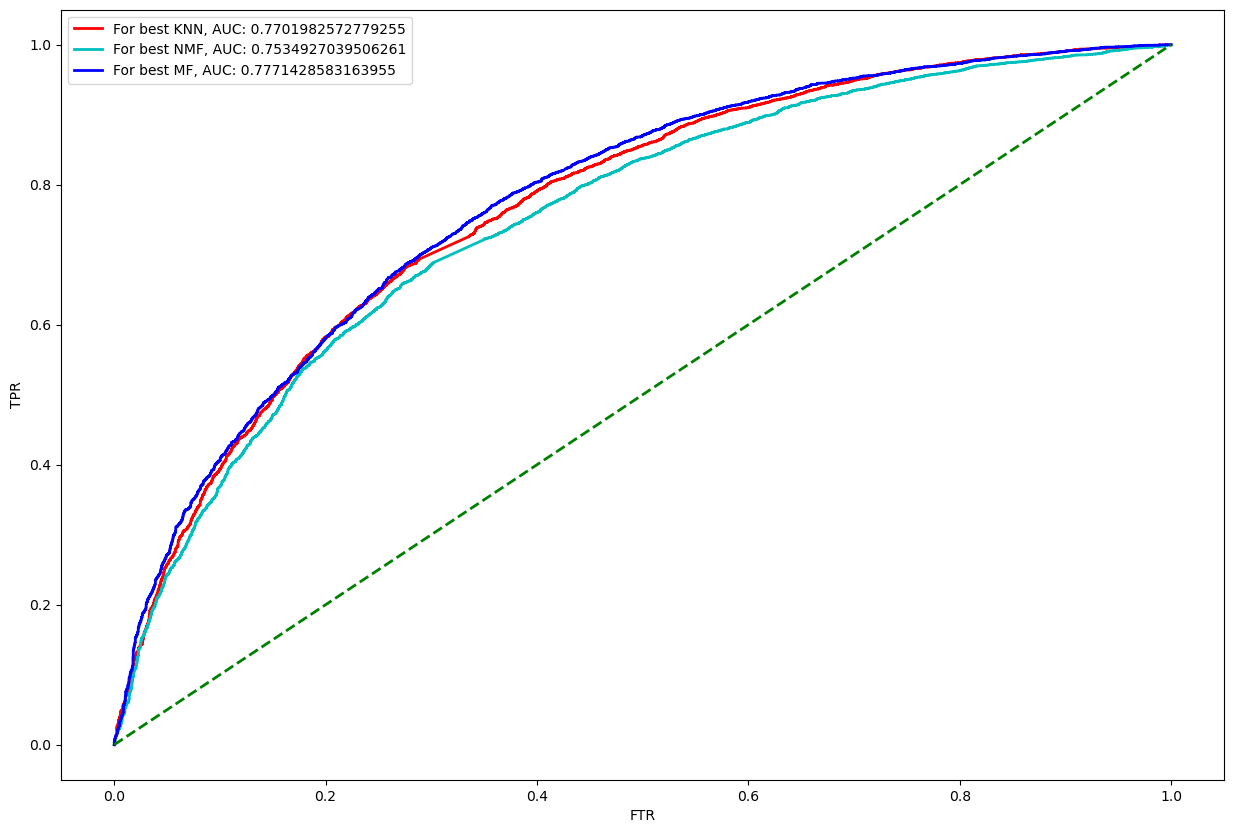

In [48]:
# plotting ROC with AUC
def roc_(algo, train, test):
    algo.fit(train)
    prediction = algo.test(test)  
    test_true = []

    for ele in prediction:
        if ele.r_ui > 3:
            test_true.append(1)
        else:
            test_true.append(0)

    fpr, tpr, _ = roc_curve(test_true, [ele.est for ele in prediction])
    
    return fpr, tpr

train, test = train_test_split(data, test_size=0.1)

knn = KNNWithMeans(k=20, sim_options = {'name': 'pearson'}, verbose = False)
nmf = NMF(n_factors=18)
mf = SVD(n_factors=20)

knn_fpr, knn_tpr = roc_(knn, train, test)
nmf_fpr, nmf_tpr = roc_(nmf, train, test)
mf_fpr, mf_tpr = roc_(mf, train, test)

plt.figure(figsize=(15,10))
plt.plot(knn_fpr, knn_tpr, lw=2, ls='-', color='r', label="For best KNN, AUC: {}".format((auc(knn_fpr,knn_tpr))))
plt.plot(nmf_fpr, nmf_tpr, lw=2, ls='-', color='c', label="For best NMF, AUC: {}".format((auc(nmf_fpr,nmf_tpr))))
plt.plot(mf_fpr, mf_tpr, lw=2, ls='-', color='b', label="For best MF, AUC: {}".format((auc(mf_fpr,mf_tpr))))
plt.plot([0, 1], [0, 1], lw=2, ls='--', color='g') 
plt.xlabel('FTR')
plt.ylabel('TPR')
plt.legend()

### QUESTION 13

- ***Understanding Precision and Recall in the context of Recommender Systems: Precision and Recall are defined by the mathematical expressions given by equations 12 and 13 respectively. Please explain the meaning of precision and recall in your own words.***
    - Recall can be seen as the fraction of items that a user likes that were recommended to them divided by the total number of items the user likes.
    - Precision can be seen as the fraction of items that a user likes that were recommended to them divided by the total number of items that were recommended to them. 

### QUESTION 14

- ***Comparing the precision-recall metrics for the different models:***
- ***For each of the three architectures:***
    - ***Plot average precision (Y-axis) against t (X-axis) for the ranking obtained using the model’s predictions.***
    - ***Plot the average recall (Y-axis) against t (X-axis) and plot the average precision (Y-axis) against average recall (X-axis).***
    - ***Use the best k found in the previous parts and sweep t from 1 to 25 in step sizes of 1. For each plot, briefly comment on the shape of the plot.***

In [10]:
t = range(1,26)

kfold_10 = KFold(n_splits=10)

def sortrating(ele): # function to order rankings
  return ele[2]

def precision_recall_plots(t, algo, kfold, data, name):
    ave_precision = []
    ave_recall = []
    for i in t:
        precision_cv = []
        precision_user = []
        recall_cv = []
        recall_user = []
        for trainset, testset in kfold.split(data):
            algo.fit(trainset)      
            prediction = algo.test(testset)
            # get set of all users and movies rated
            G = defaultdict() 
            for j in testset:
                if j[0] not in G.keys():
                        G[j[0]] = [j]
                else:
                    G[j[0]].append(j)
            # get movie ids of movies a user rated
            G_filtered_movie_id = defaultdict()
            for key in G:
                if len(G[key])>0 and len(G[key])>=i: # filter users with no ratings or less than t number of ratings
                    G_filtered_movie_id[key]={j[1] for j in G[key] if j[2]>=3} # G set with only movie ids, thresholded
            G_filtered_movie_id = {key:value for key,value in G_filtered_movie_id.items() if len(value)>0}
            S = defaultdict()
            # make s set
            for j in prediction: 
                if j.uid not in S.keys() and j.uid in G_filtered_movie_id.keys(): # only keep users that have a G group
                    S[j.uid]=[(j.uid, j.iid, j.est)]
                elif j.uid in G_filtered_movie_id.keys():
                    S[j.uid].append((j.uid, j.iid, j.est))
            for user in S:
                S[user].sort(reverse=True, key=sortrating)
                S[user] = S[user][:i] # s set with only t items
                S[user] = {j[1] for j in S[user]} # s set with only movie ids
                precision_user.append(len(G_filtered_movie_id[user].intersection(S[user]))/len(S[user])) # get precision
                recall_user.append(len(G_filtered_movie_id[user].intersection(S[user]))/len(G_filtered_movie_id[user])) # get recall
        precision_cv.append(np.mean(precision_user))
        recall_cv.append(np.mean(recall_user))
        ave_precision.append(np.mean(precision_cv))
        ave_recall.append(np.mean(recall_cv))

    # plot precision and recall    
    plt.figure(figsize=(10, 15))
    plt.subplot(3, 1, 1)
    plt.plot(t,ave_precision)
    plt.title('t vs Average Precision using ' + name)
    plt.xlabel('t Value')
    plt.ylabel('Average Precision')

    plt.subplot(3, 1, 2)
    plt.plot(t,ave_recall)
    plt.title('t vs Average Recall using '+ name)
    plt.xlabel('t Value')
    plt.ylabel('Average Recall')

    plt.subplot(3, 1, 3)
    plt.plot(ave_recall,ave_precision)
    plt.title('Average Recall vs Average Precision using '+ name)
    plt.xlabel('Average Recall')
    plt.ylabel('Average Precision')

    return ave_precision, ave_recall

- The 3 plots for precision and recall using KNN is shown below. In general, as t increases, the average precision decreases while the average recall increases. Additionally, as the average recall increases, the average precision decreases. However, it can be noted that the average precision doesn't drastically decrease, but the average recall increases. 

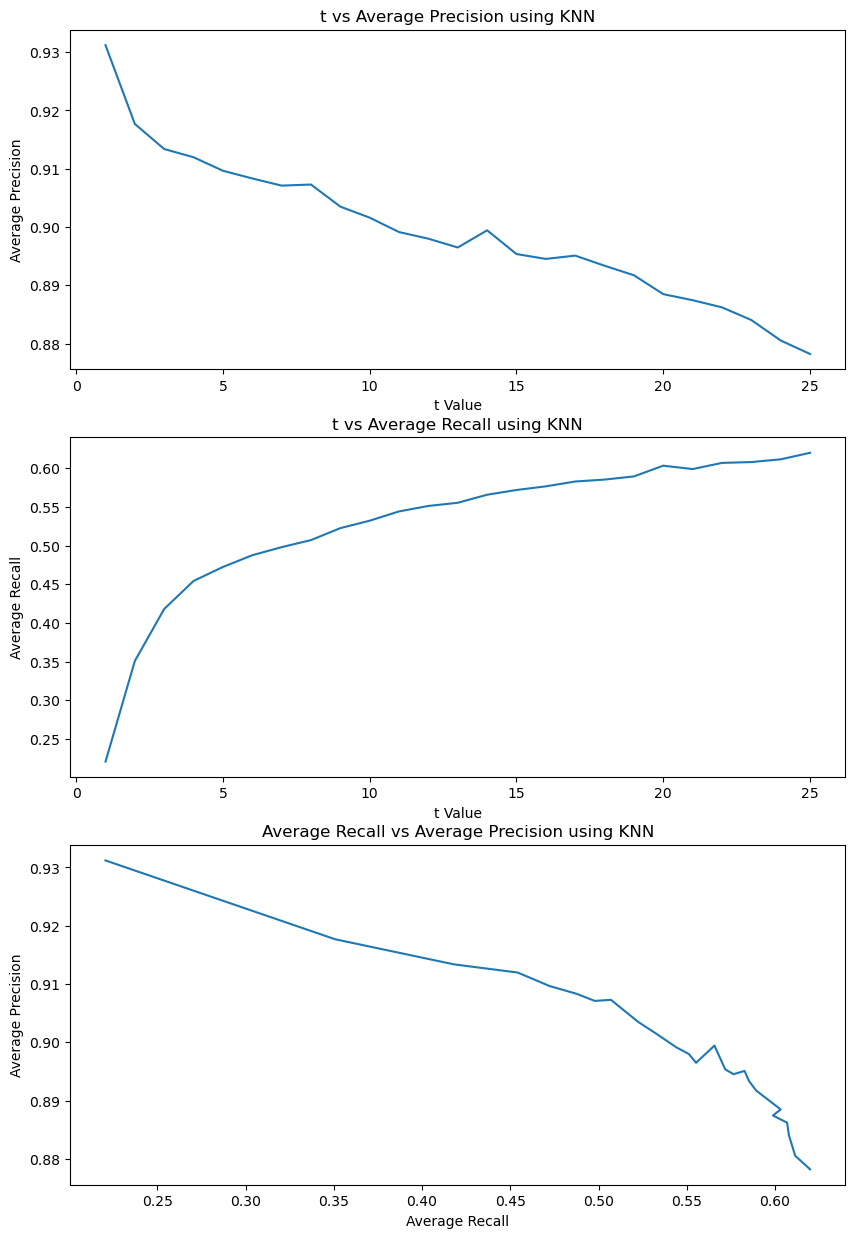

In [11]:
KNNave_precision, KNNave_recall = precision_recall_plots(range(1,26), KNNWithMeans(k=20, sim_options = {'name': 'pearson'}, verbose = False), kfold_10, data, 'KNN')



- The 3 plots for precision and recall using NMF is shown below. In general, as t increases, the average precision decreases while the average recall increases. Additionally, as the average recall increases, the average precision decreases. Again, it can be noted that the average precision doesn't drastically decrease, but the average recall increases. 

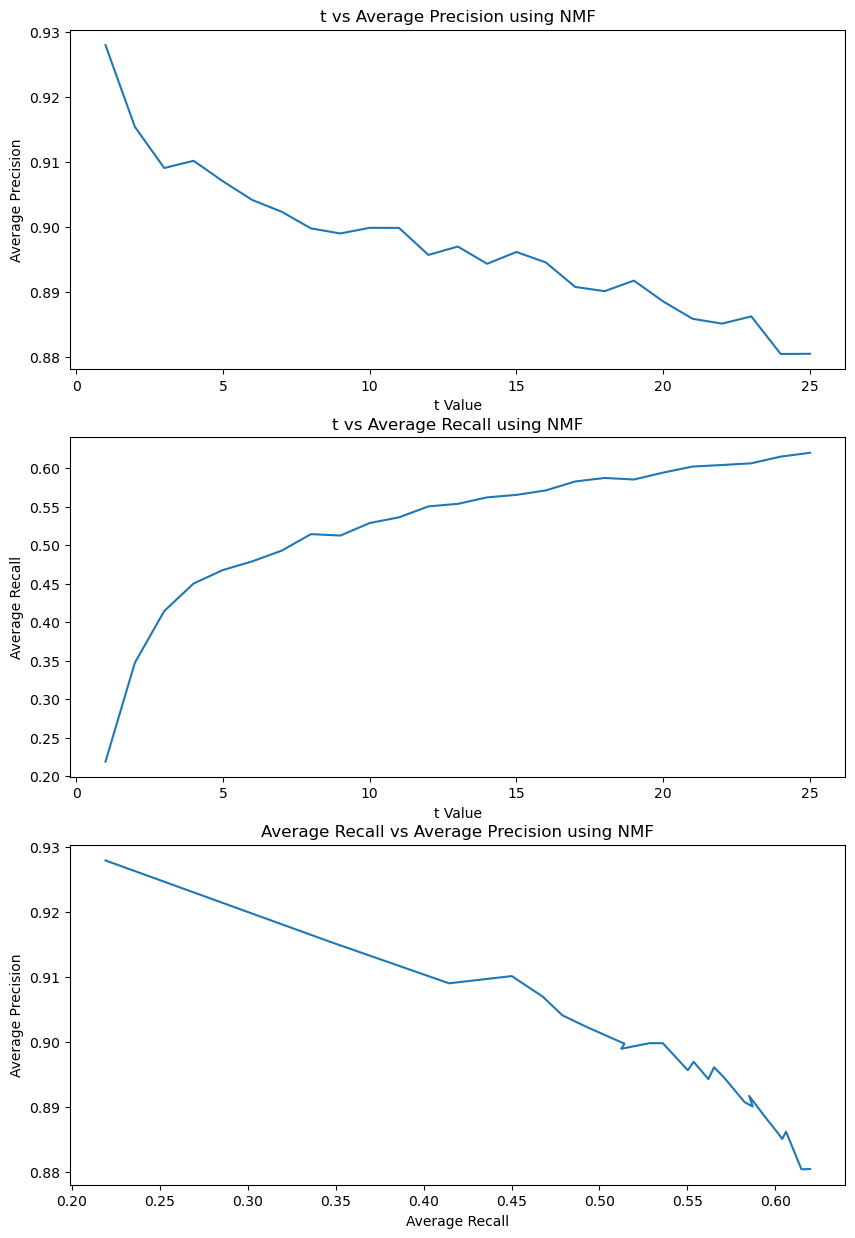

In [12]:
NMFave_precision, NMFave_recall = precision_recall_plots(range(1,26), NMF(n_factors=18), kfold_10, data, 'NMF')



- The 3 plots for precision and recall using MF is shown below. In general, as t increases, the average precision decreases while the average recall increases. Additionally, as the average recall increases, the average precision decreases. Again, it can be noted that the average precision doesn't drastically decrease, but the average recall increases. 

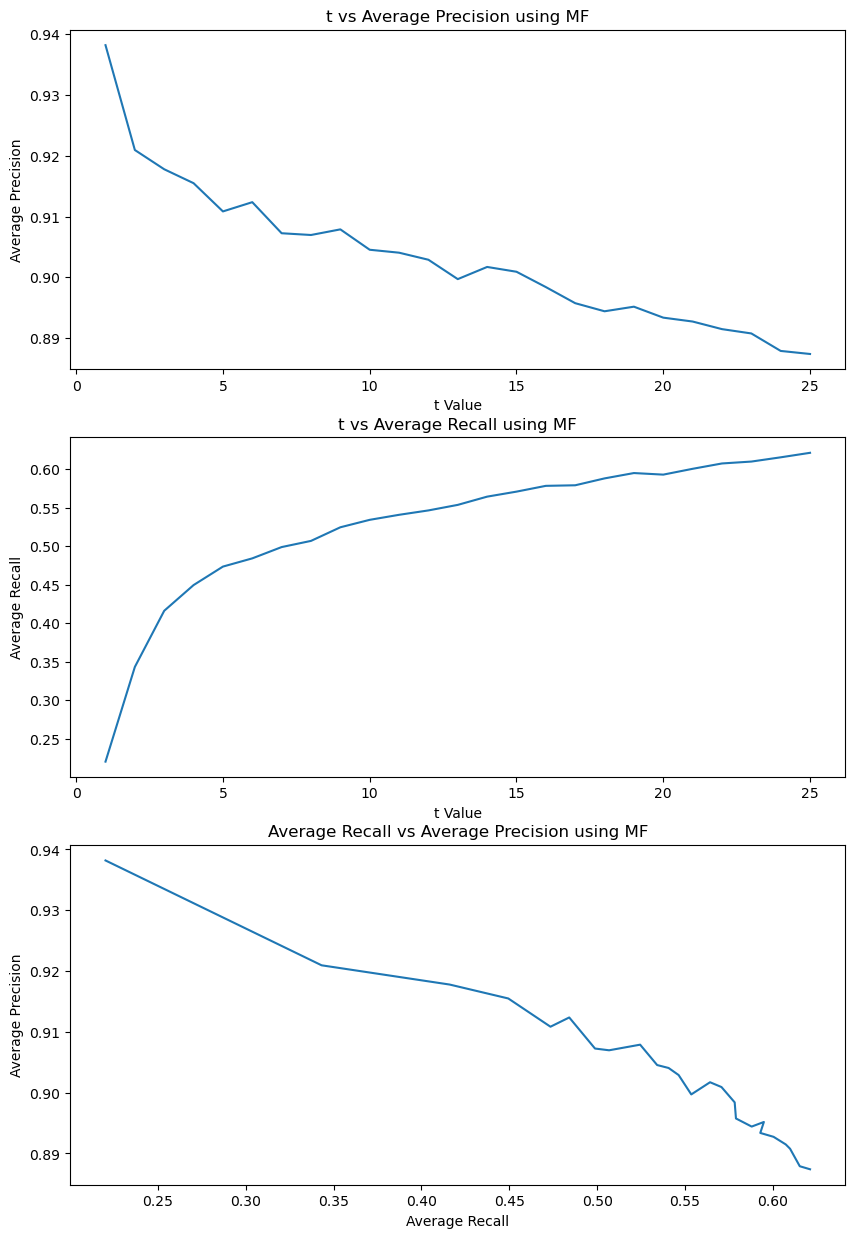

In [13]:
MFave_precision, MFave_recall = precision_recall_plots(range(1,26), SVD(n_factors=20), kfold_10, data, 'MF')



- ***Plot the best precision-recall curves obtained for the three models (k-NN, NMF, MF) in the same figure. Use this figure to compare the relevance of the recommendation list generated using k-NN, NMF, and MF with bias predictions.***
    - The plot is shown below. Using all 3 models, it can be see that as the average recall increases, the average precision decreases. For the best recommender system, we'd want to maximize recall and precision. Since the MF model has the highest precision as the recall increases, it has the best performance. Using this to rank the models, KNN would have the second best performance and MF will have the worst performance out of the 3 models. This implies that the MF model is able to recommend movies with genres closest to what the user is interested in. This plot also suggests that we'd have to select an optimal recall and precision as both cannot be perfectly maximized as they have an inverse relationship. 

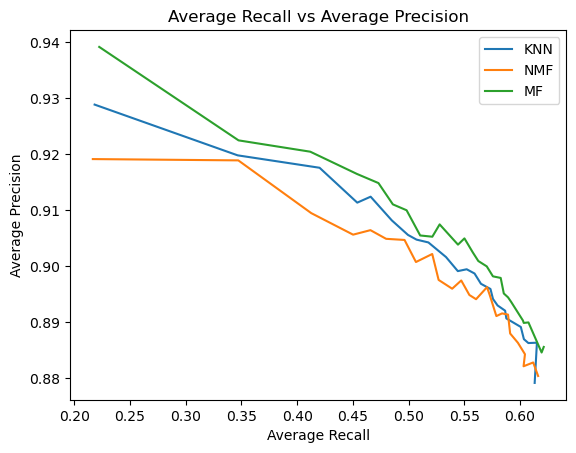

In [166]:
# plot the 3 recall vs precision plots.
plt.plot(KNNave_recall, KNNave_precision, label = 'KNN')
plt.plot(NMFave_recall, NMFave_precision, label = 'NMF')
plt.plot(MFave_recall, MFave_precision, label = 'MF')
plt.title('Average Recall vs Average Precision')
plt.xlabel('Average Recall')
plt.ylabel('Average Precision')
plt.legend(loc="best")